<div class="alert alert-success" role="alert">
<h1> House Price Prediction  </h1>
<h2> Advanced regression Assignment</h2>

<h4>Submitted by: Siddharth parakh</h4>
</div>

# <font color= green> Housing Price Prediction Assignment</font>

## <font color=orange>Problem Statement</font>

### Assignment 

- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

- The company wants to know the following things about the prospective properties:

   - `Which variables are significant in predicting the price of a house`, and

   - `How well those variables describe the price of a house`.

 

- Also, determine the `optimal value of lambda for ridge and lasso regression`.

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## <font color=palevioletred>Problem Statement - Part II</font>


### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 

### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

 

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

 

### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?
## _______________________________________________________________

#  Flow of this Assignment

### 1) Read and Understand the data

### 2) Data Exploration

- Univariate Analysis
- Bivariate Analysis

### 3) Feature Engineering

### 4) Data Preprocessing

- Missing Value Treatment
- Dummy Variable Creation
- Outlier Treatment

### 5) Model Building, Tuning & Evaluation

- Split the Data into Dependent and Independent variables
- Train - Test Split
- Scaling numerical columns



- Model 1: Ridge Regression

- Model 2: Lasso


### 6) Comparing the two models

### 7) Inferences for 'Surprise Housing' 

### 8) Coding for answering the subjective questions

#  Load Modules

In [1]:
# importing all the important modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## <font color=cornflowerblue>Step 1:   Read and Understand the Data</font>

In [3]:
## Load the csv file
df = pd.read_csv('train.csv')

## View the first five rows
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
## Check the dimensions
print("Number of Rows = ", df.shape[0])
print("Number of Columns = ", df.shape[1])

Number of Rows =  1460
Number of Columns =  81


In [5]:
#checking duplicates
sum(df.duplicated(subset = 'Id')) == 0

True

In [6]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### categorical columns


- `Alley` :  NA =  No alley access
- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` : NA = No Basement
- `FireplaceQu` : NA = No Fireplace
- `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` : NA = No Garage
- `PoolQC` : NA = No Pool
- `Fence` : NA = No Fence
- `MiscFeature` : NA = None


So, we will have to replace these by 'None' before finding missing values.


For this we will read the csv file again and set the parameter 'keep_default_na' to False


In [7]:
## Preventing 'NA' to be read as 'NaN' by pandas
df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [8]:
## Replacing all 'NA' of all above mentioned columns by 'None'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [9]:
## Check the info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

###  Looking at the data types of all columns and comparing them with the data description of each columns, we deduce that the types of following columns have to be changed:

- Columns `MSSubClass`, `OverallQual`, `OverallCond` need to be converted to **object** type
- Column `LotFrontage` and `MasVnrArea` needs to be converted to **numeric** type. 

In [10]:
## Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [11]:
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [12]:
## Check whether the data types of five columns have changed
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [13]:
## View the statistical description of the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
90%    1314.100000    96.000000   14381.700000  2006.000000   2006.000000   
95%    1387.050000   107.000000   17401.150000  2007.000000   2007.000000   
99%    1445.410000   141.000000   37567.640000  2009.000000   2009.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
90%     335.000000  1065.500000   117.200000  1232.000000  1602.200000   
95%     456.000000  1274.000000   396.200000  1468.000000  1753.000000   
99%     791.920000  1572.410000   830.380000  1797.050000  2155.050000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
90%    1680.000000   954.200000      0.000000  2158.300000      1.000000   
95%    1831.250000  1141.050000      0.000000  2466.100000      1.000000   
99%    2219.460000  1418.920000    360.000000  3123.480000      2.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
90%        0.000000     2.000000     1.000000      4.000000      1.000000   
95%        1.000000     2.000000     1.000000      4.000000      1.000000   
99%        1.000000     3.000000     1.000000      5.000000      2.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0

###  The mean of few variables like `2ndFlrSF` are very different from their median values, so they have skewed distributions.

In [14]:
## Check for missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

###  There are only two columns containing missing values : `LotFrontage` and `MasVnrArea`,  and we will perform missing value treatment on them.

# <font color=cornflowerblue>Step 2:  Data Exploration - Visualization </font>

## <font color=palevioletred>Univariate Analysis</font>

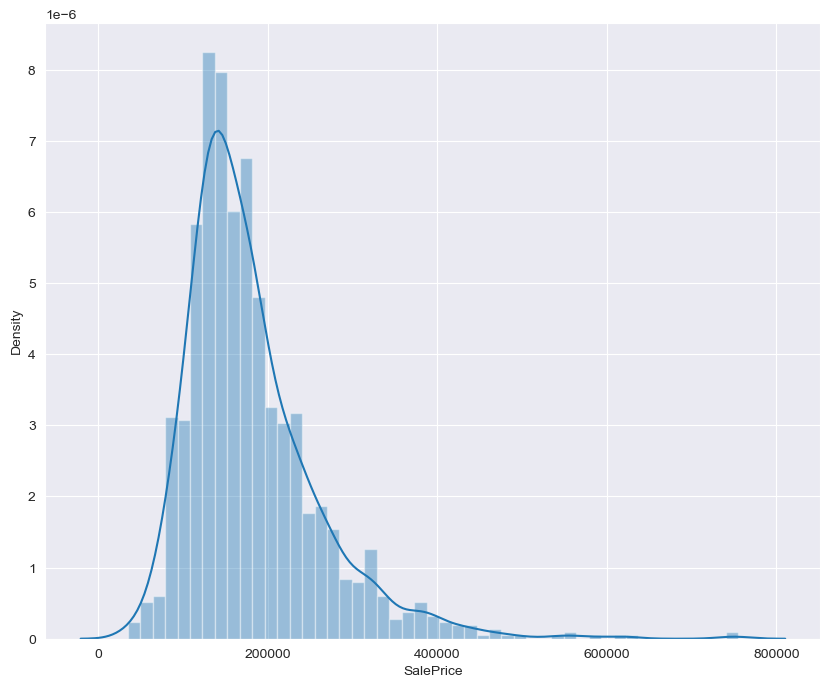

In [15]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

###  The target variable is right-skewed

In [16]:
## Check the skewness of target variable
df['SalePrice'].skew()

1.8828757597682129

###  The skewness is greater than 1, so the target variable is highly skewed.

In [17]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()

6.536281860064529

###  The kurtosis is greater than 1, so the distribution of target variable is highly peaked.
###  So, we will log transform our target variable

In [18]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [19]:
## Check the skewness of target variable again
df['SalePrice'].skew()

0.12133506220520406

In [20]:
## Check the kurtosis of target variable again
df['SalePrice'].kurt()

0.8095319958036296

###  Both skewness and kurtosis are less than 1 now.

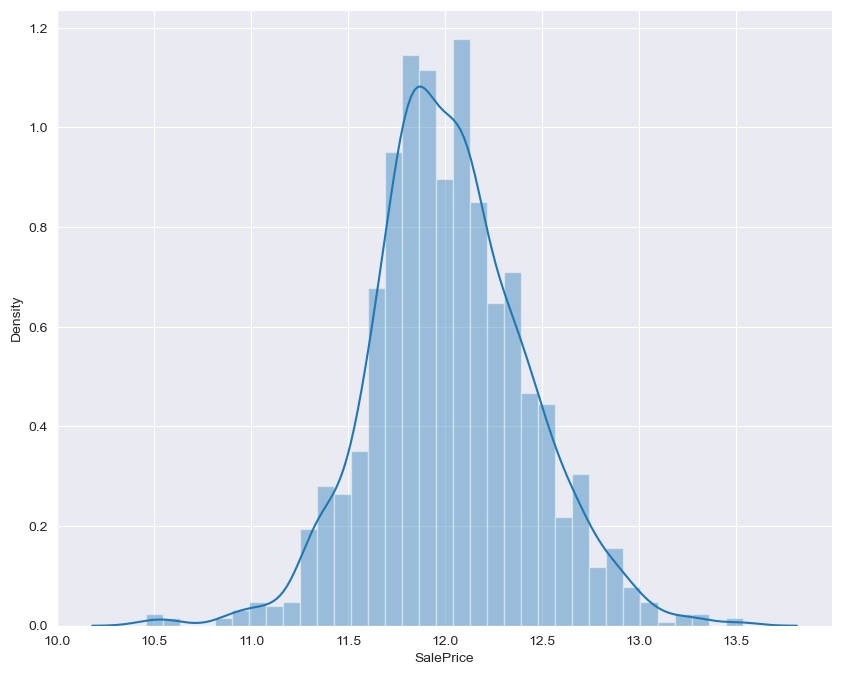

In [21]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

###  So, our target variable has normal distribution now.

In [22]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

In [23]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

## EDA on Numerical Columns

In [24]:
## create histograms and boxplots function

def visualization_cols(field):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(field, fontdict={'fontsize': 18})
    sns.distplot(df_num[field])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[field])
    plt.show()    

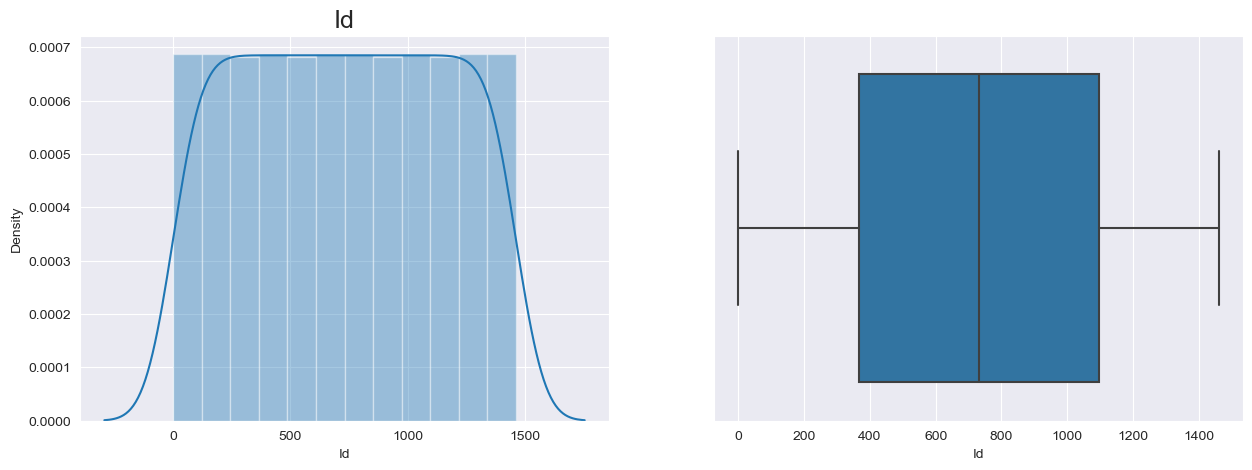

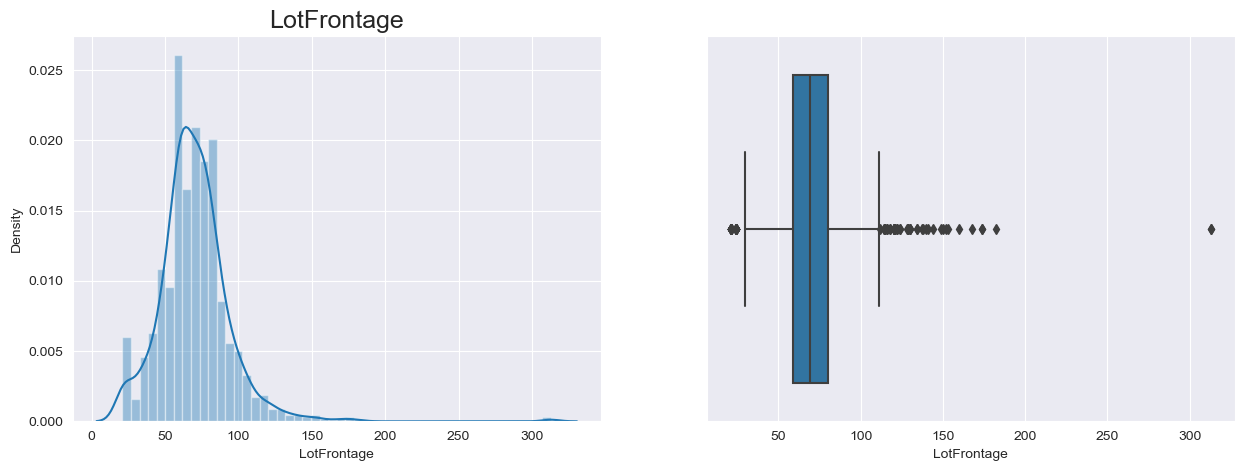

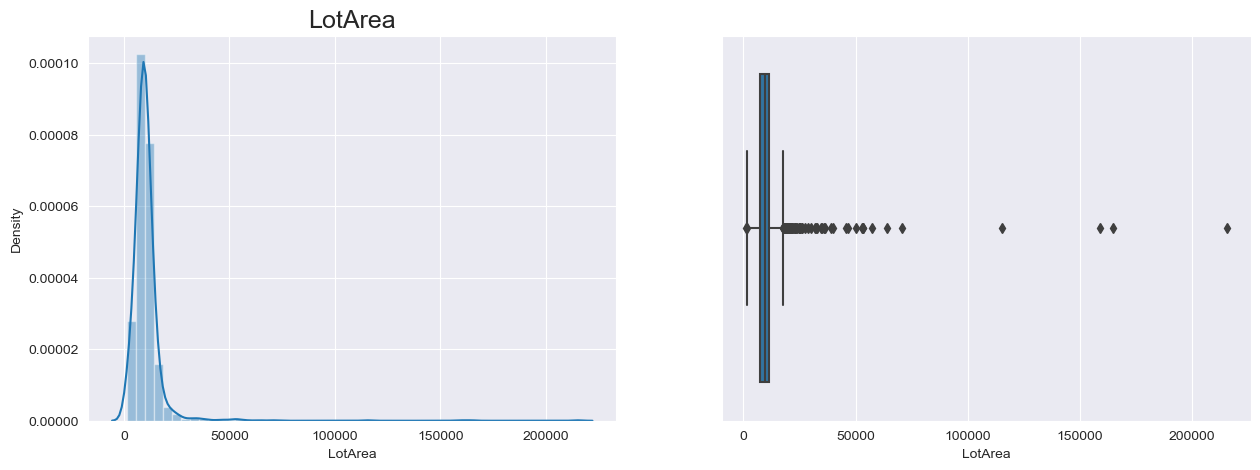

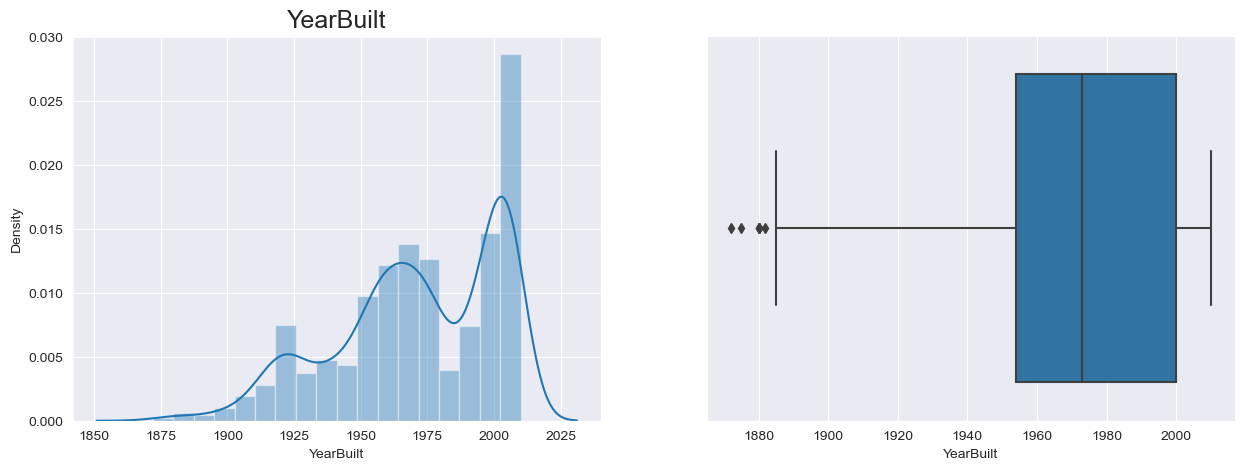

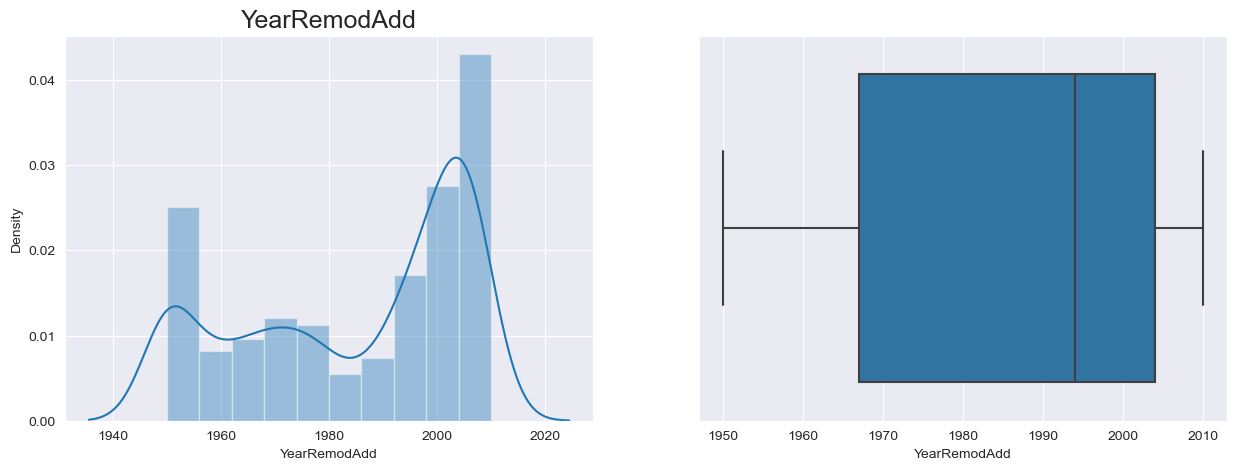

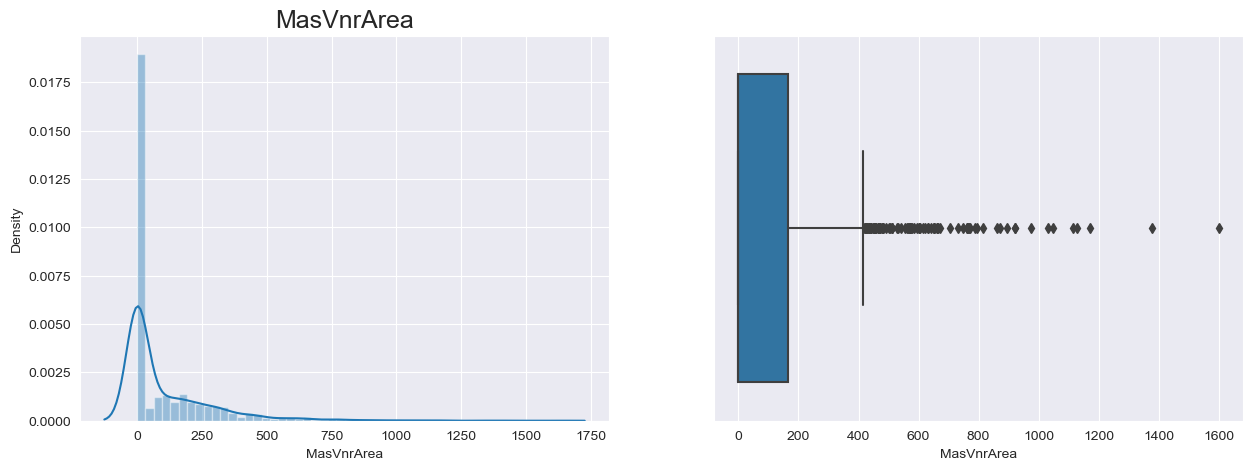

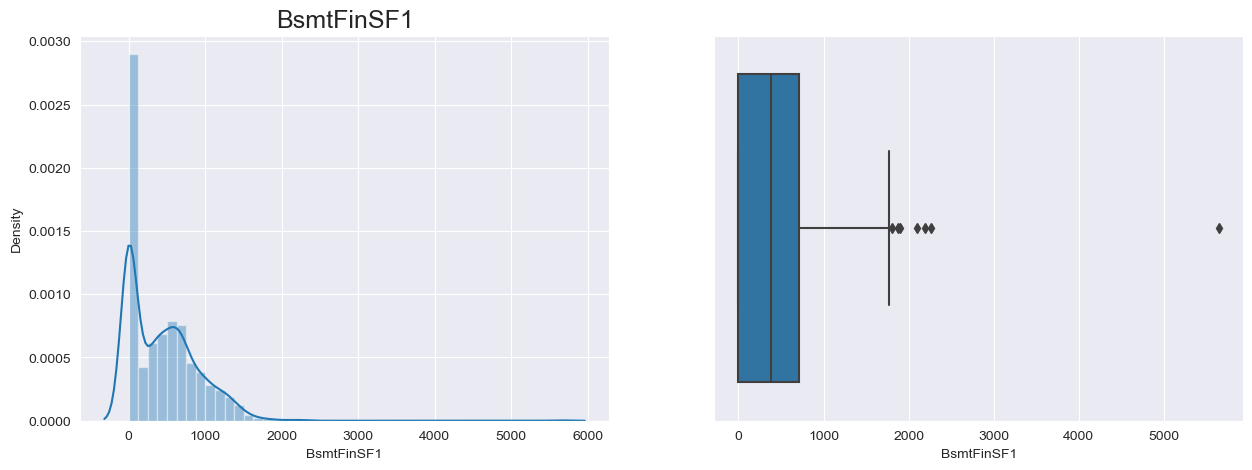

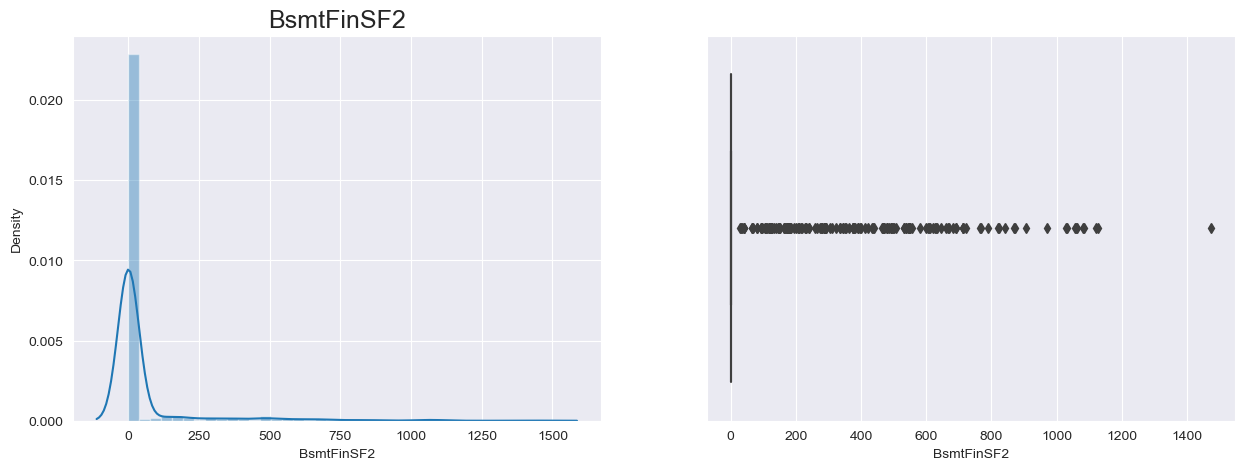

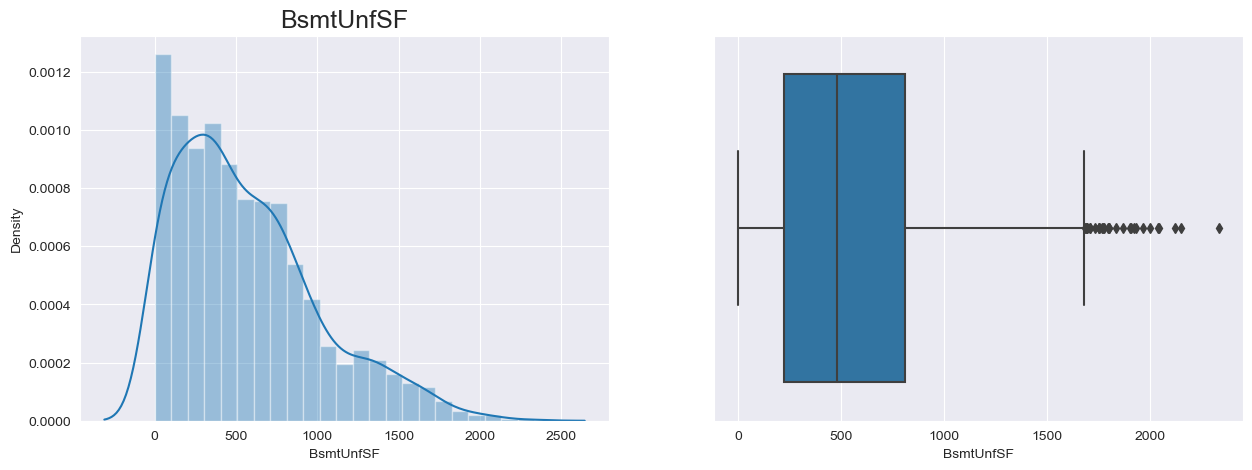

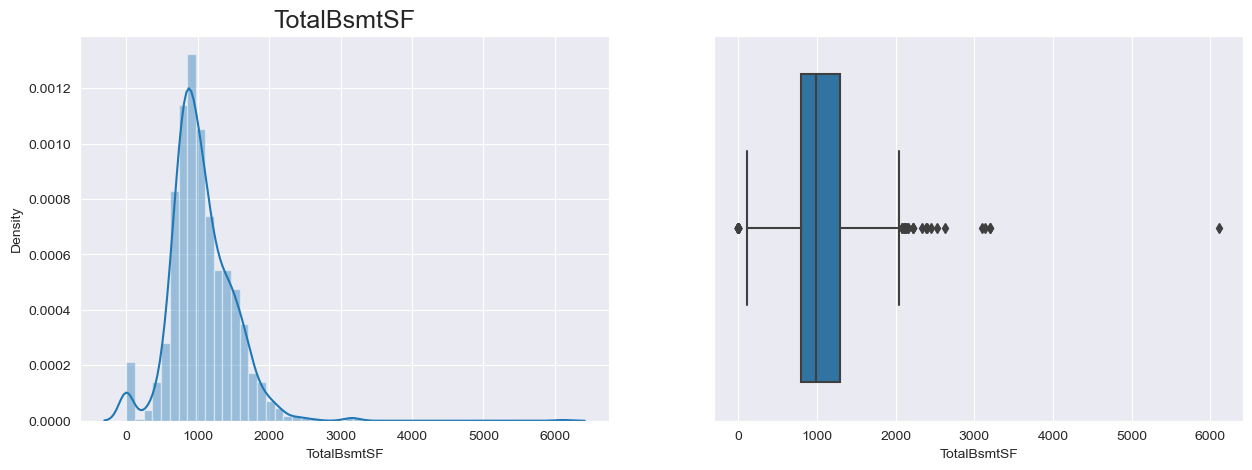

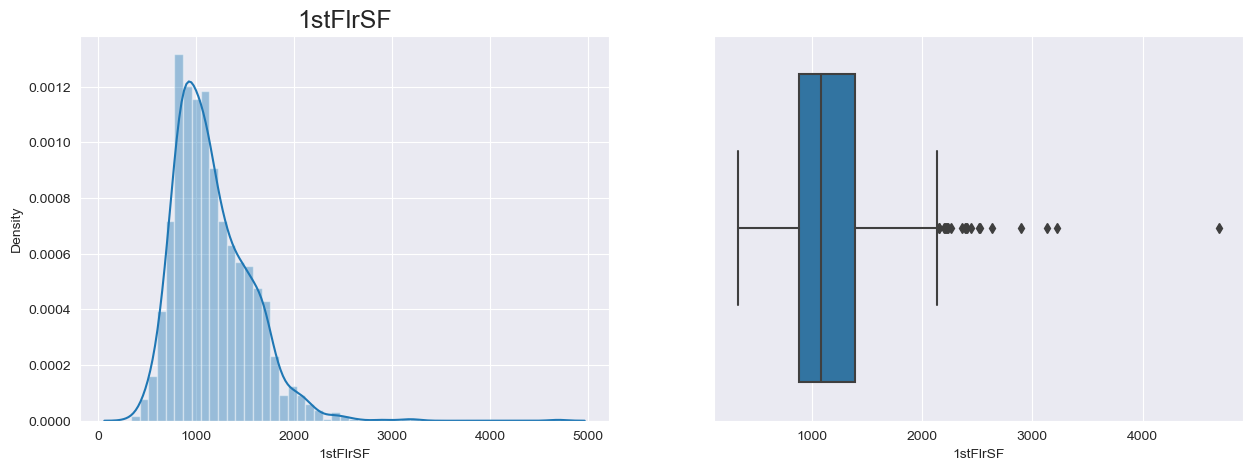

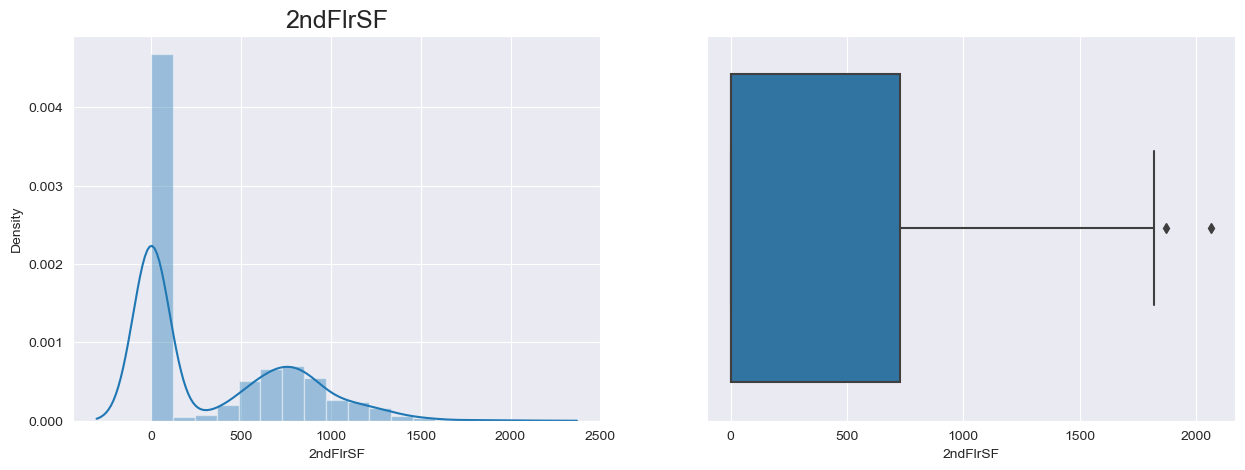

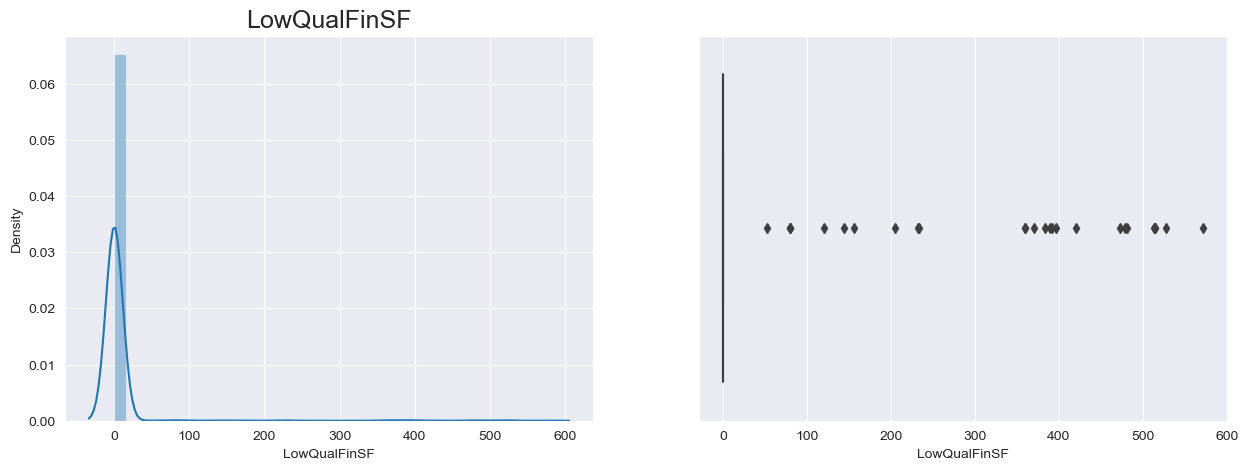

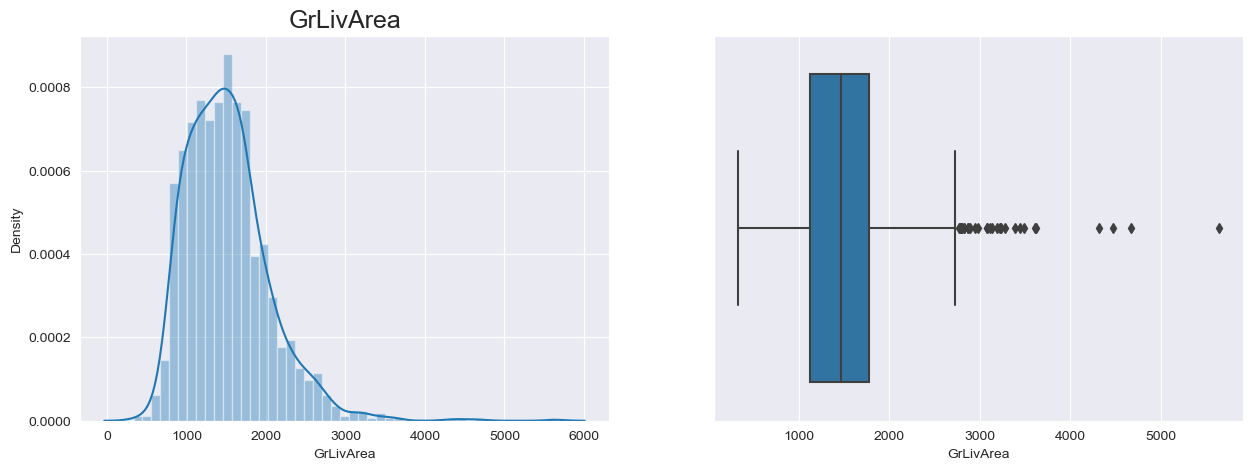

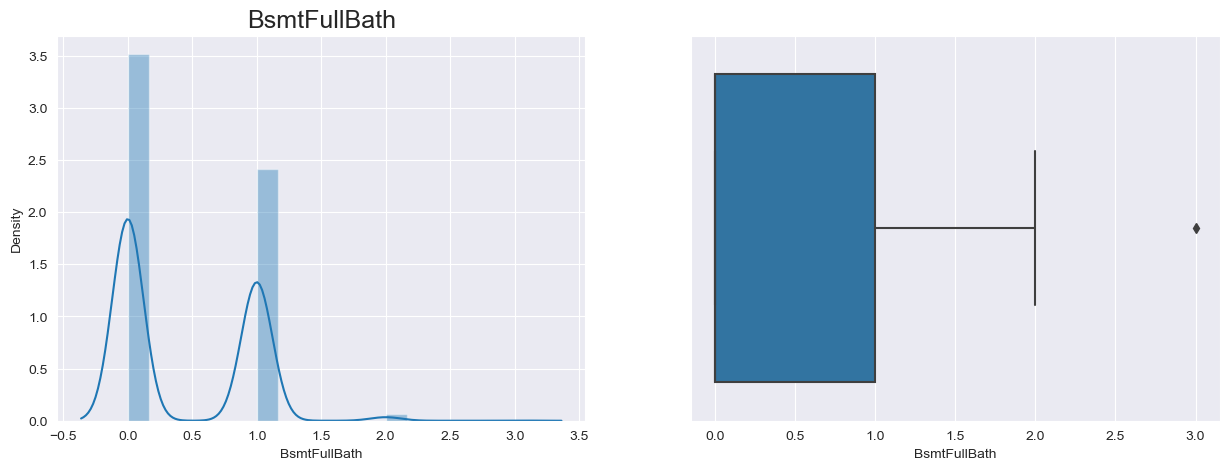

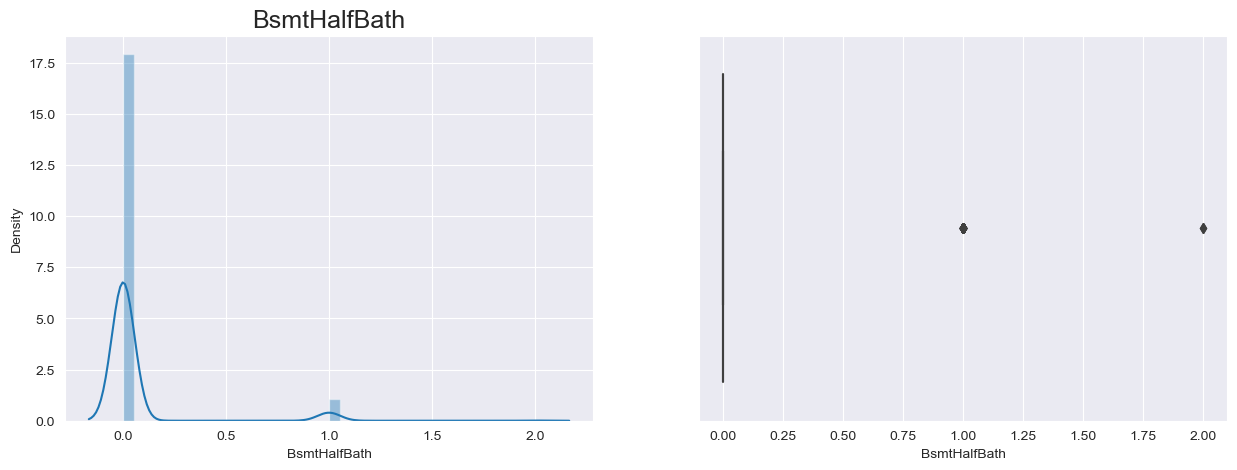

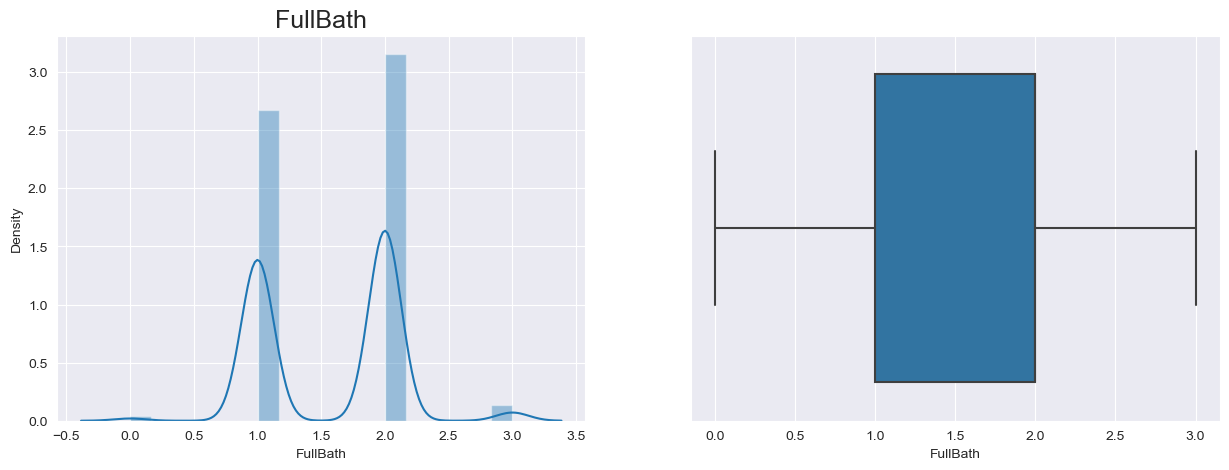

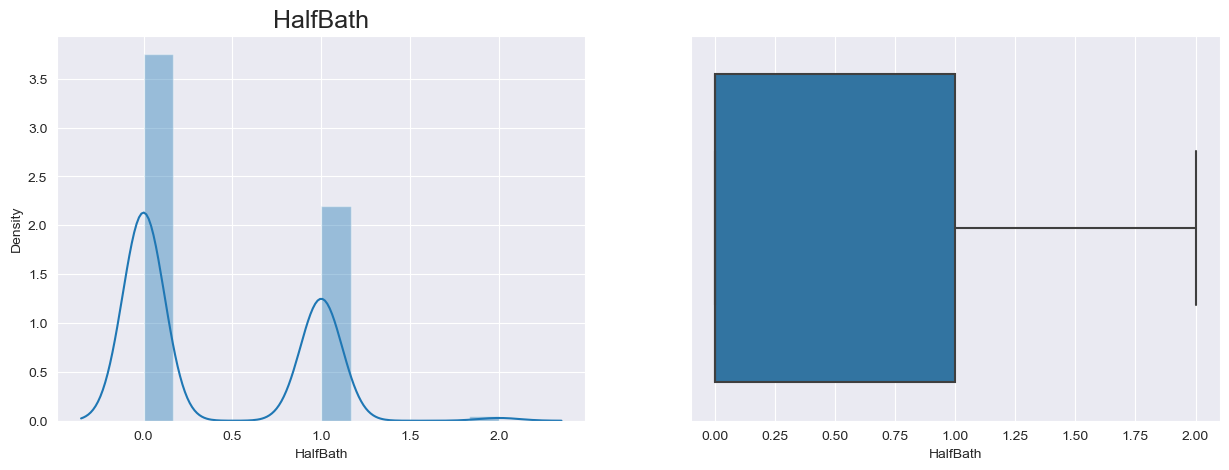

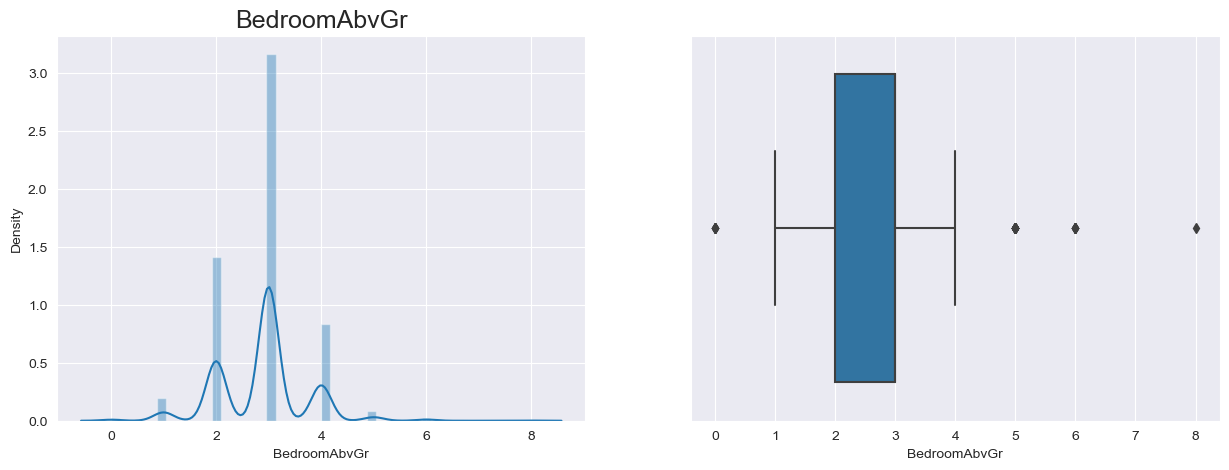

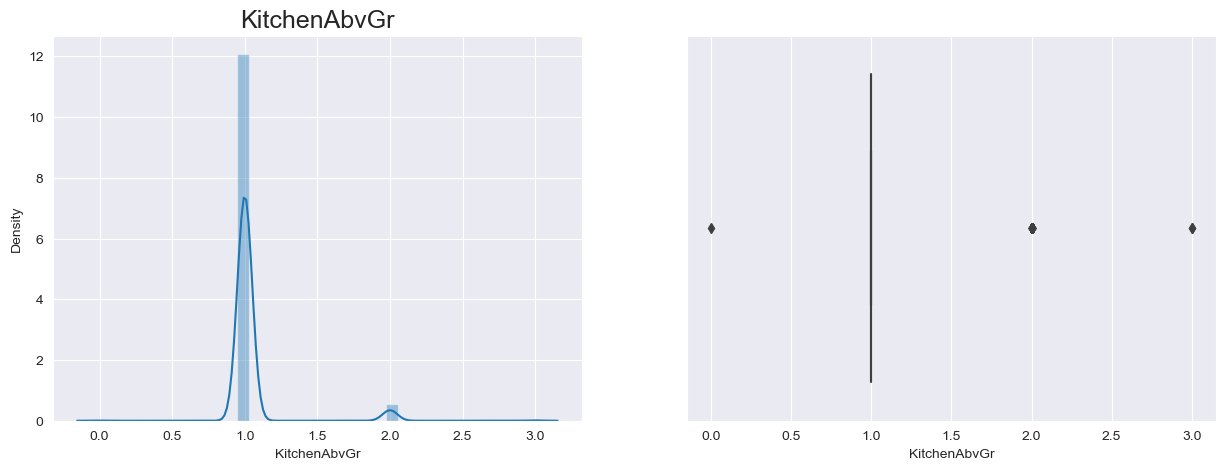

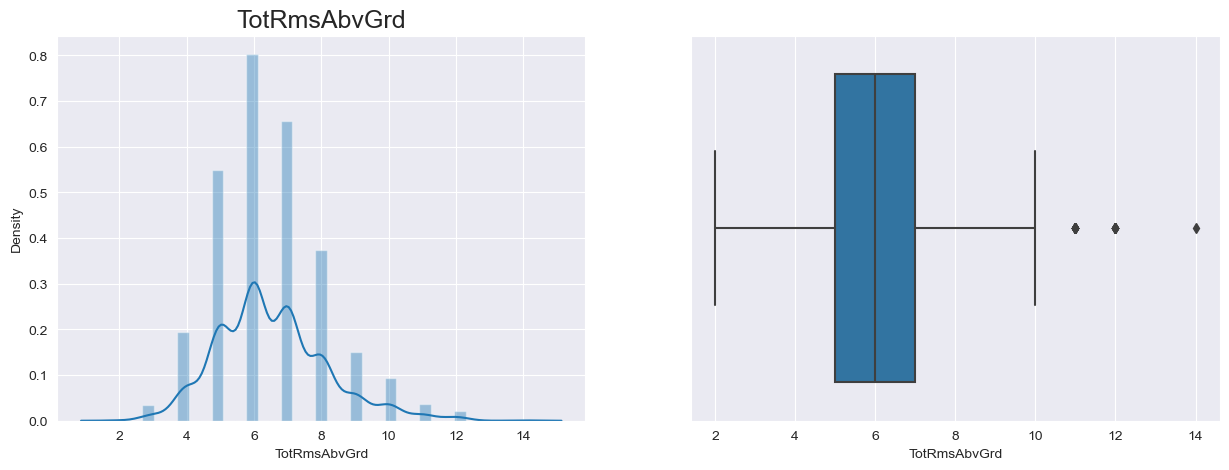

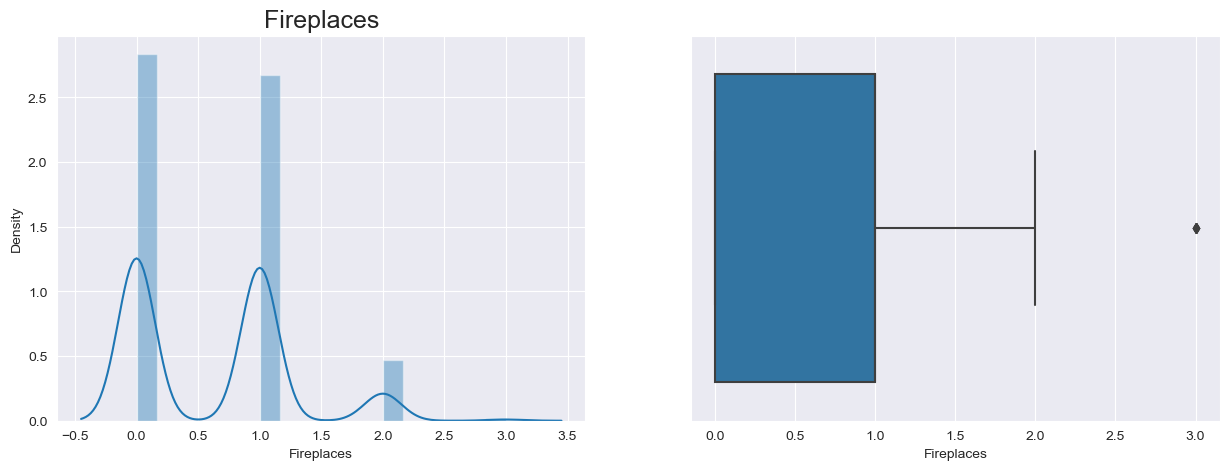

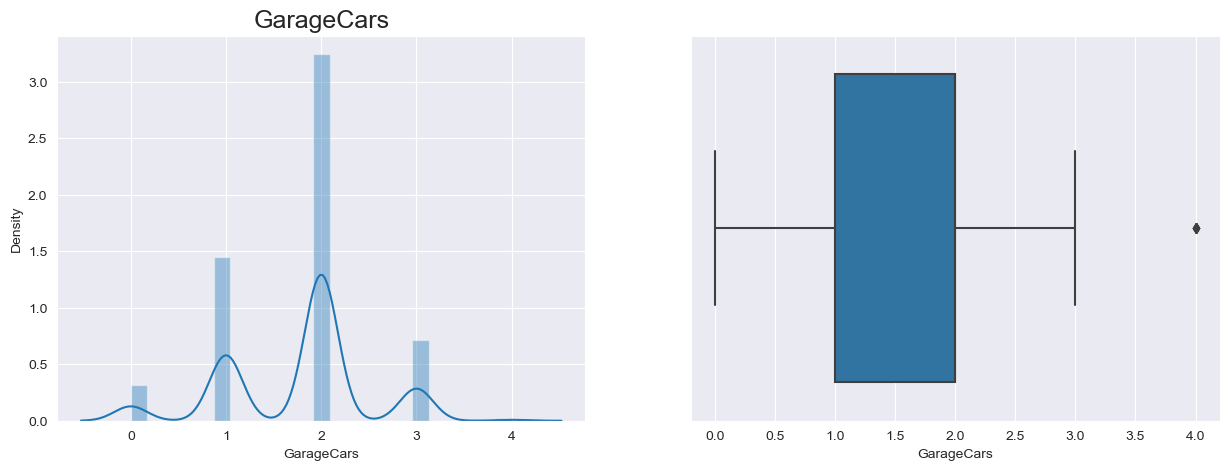

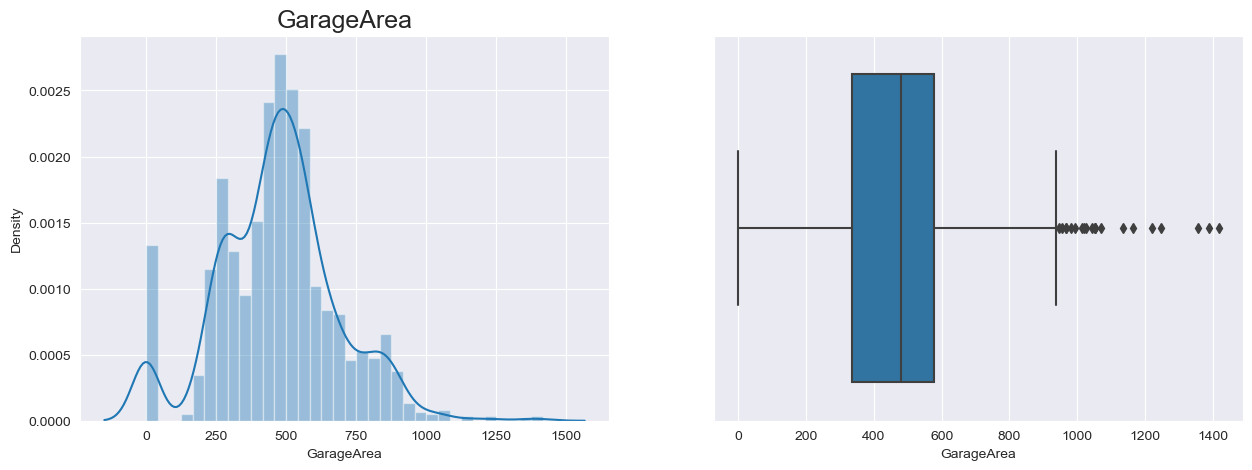

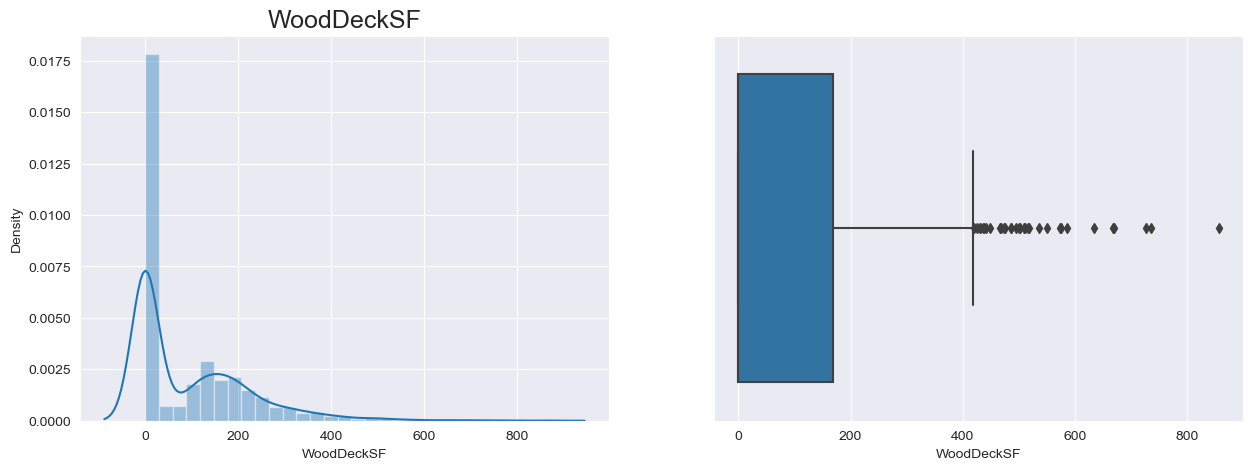

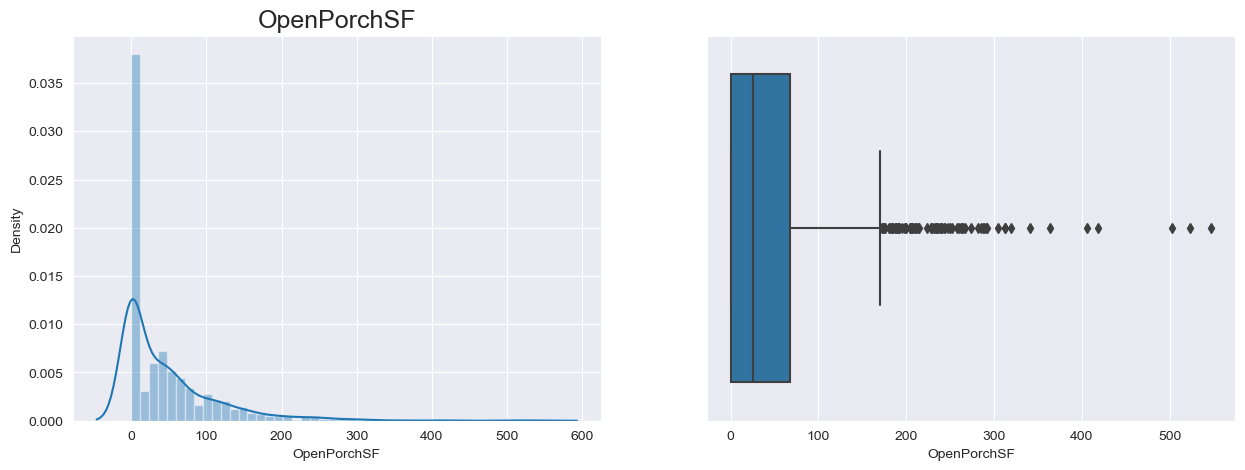

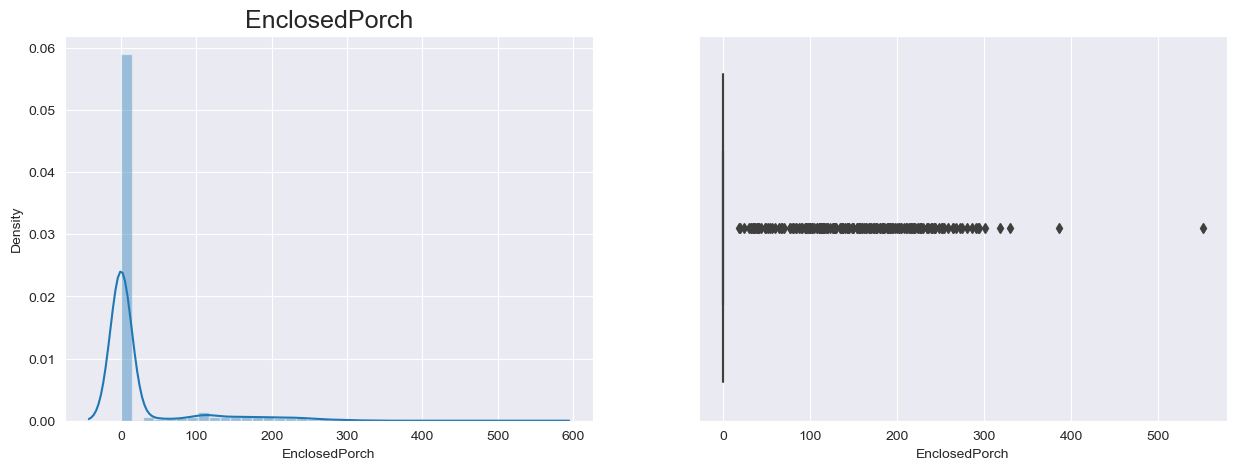

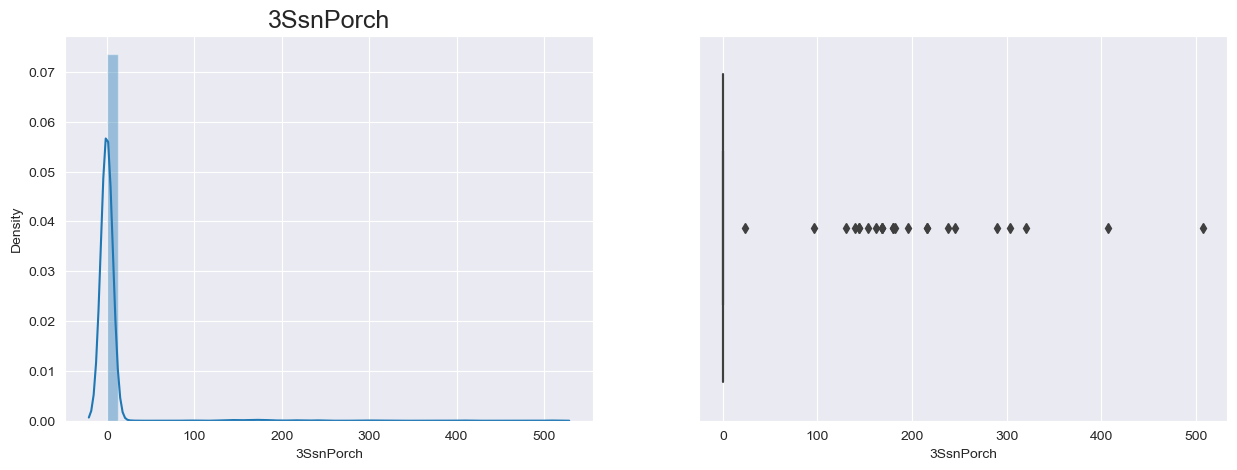

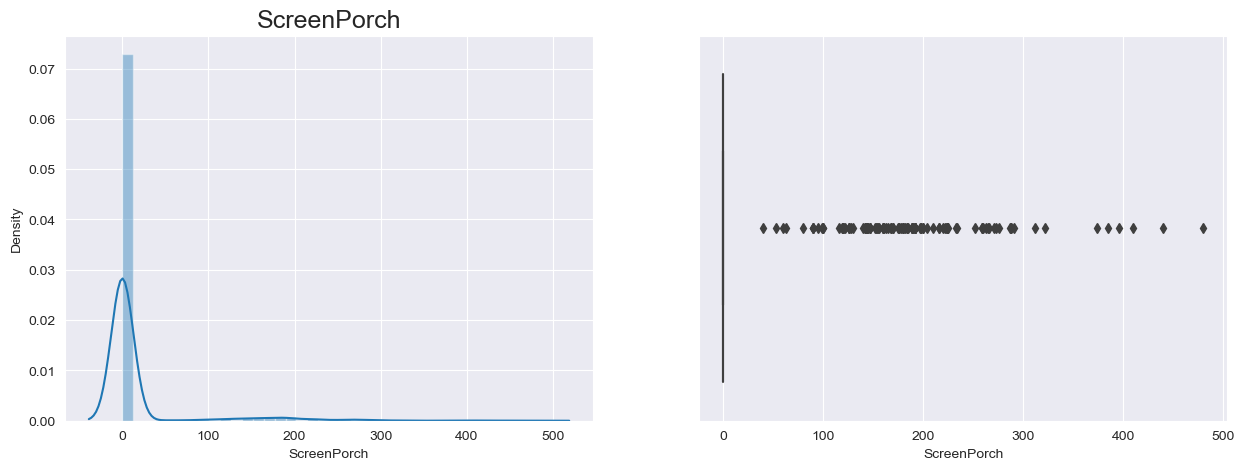

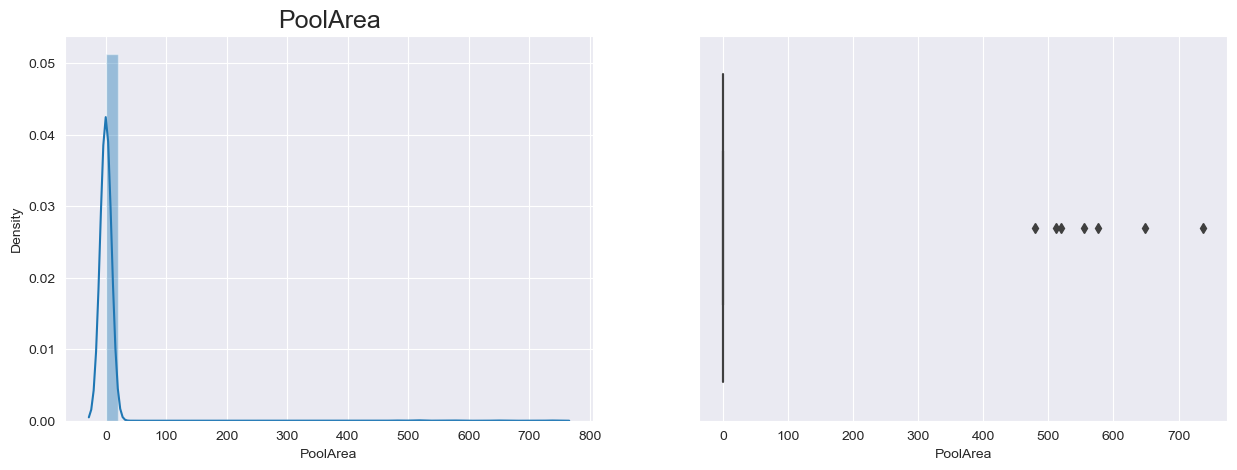

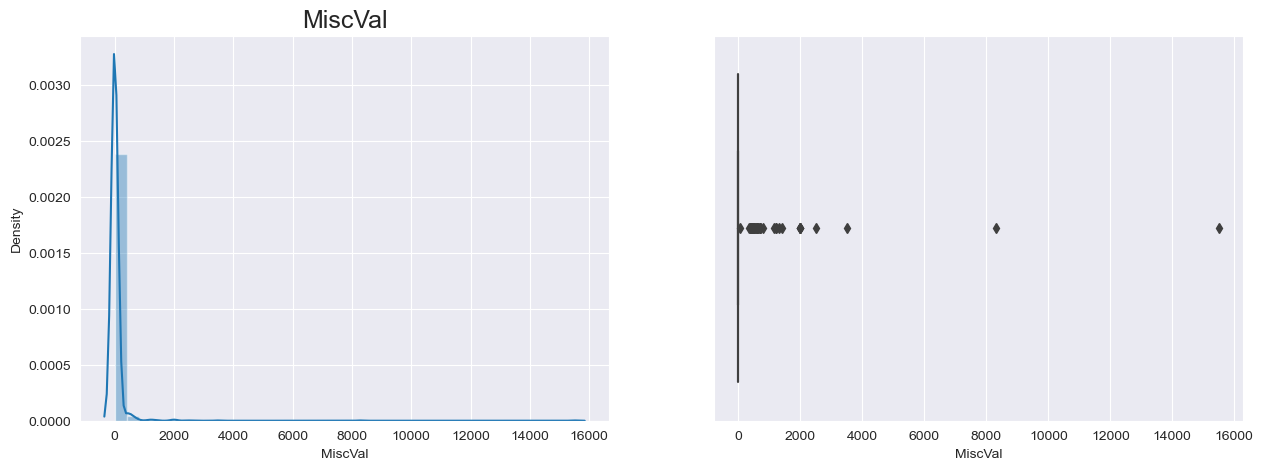

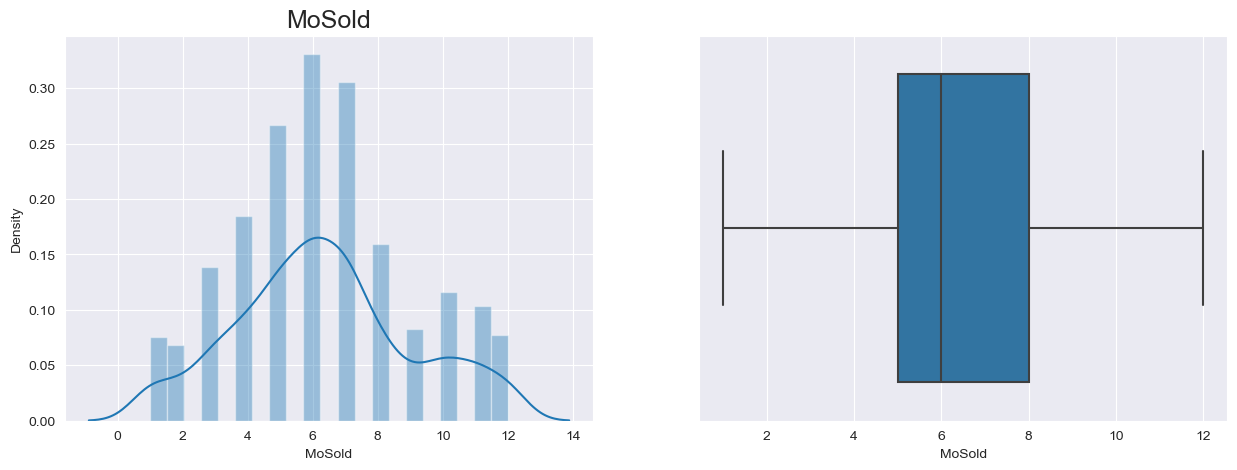

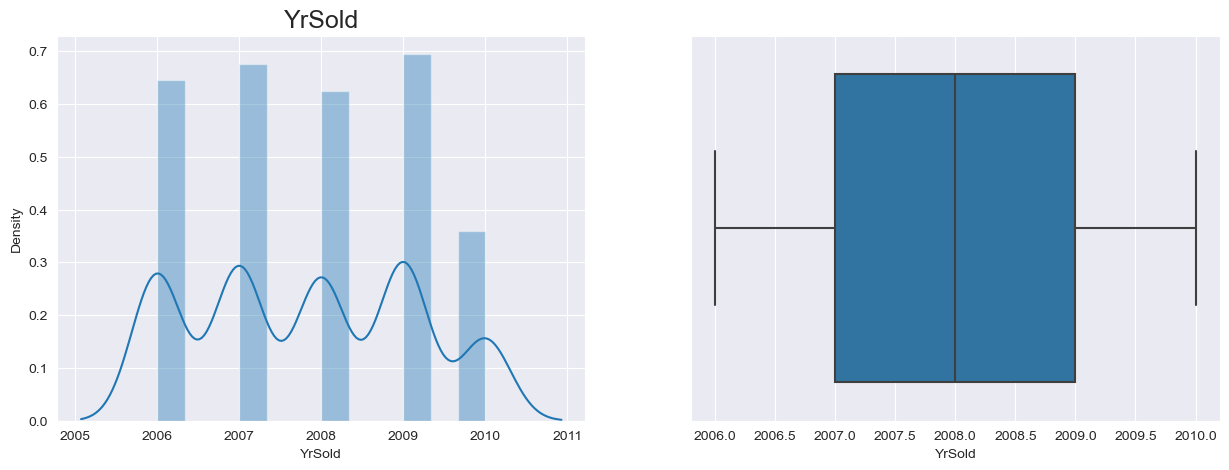

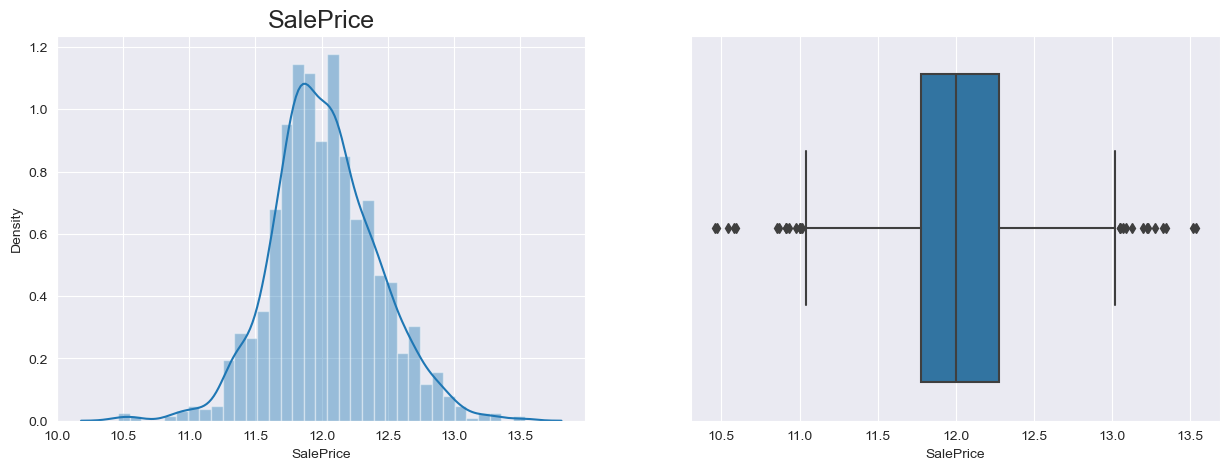

In [25]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
  visualization_cols(col)

###  Many of the numerical columns are having non-normal distribution.  
###  Most of the columns have outliers. So, we will require to do Outlier treatment.

## <font color=palevioletred>EDA on Categorical Columns</font>

In [26]:
## function for unique values
def unique_values(field):
    print(field)
    print(df[field].unique(), '\n')

In [27]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    unique_values(col)

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

In [28]:
# function for barplot 
def visualization_barplot(field):
    plt.figure(figsize=(8,5))
    plt.title(field, fontdict={'fontsize': 18})
    sns.barplot(df_cat[field].value_counts().index, df_cat[field].value_counts())
    plt.show()

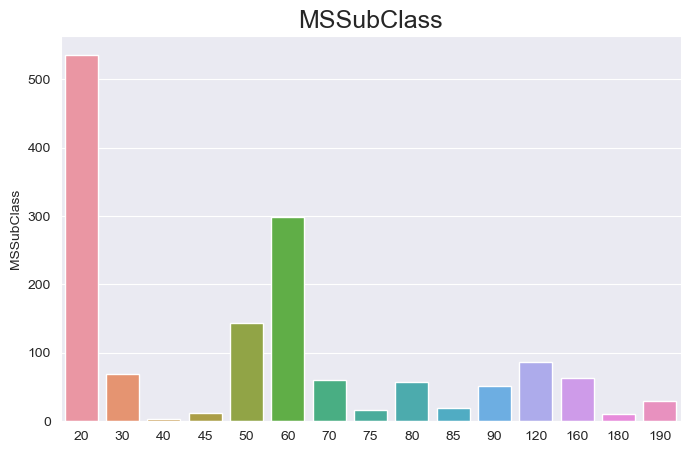

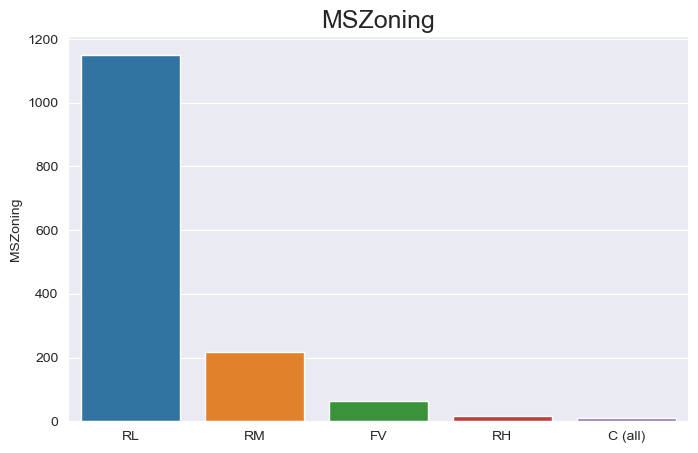

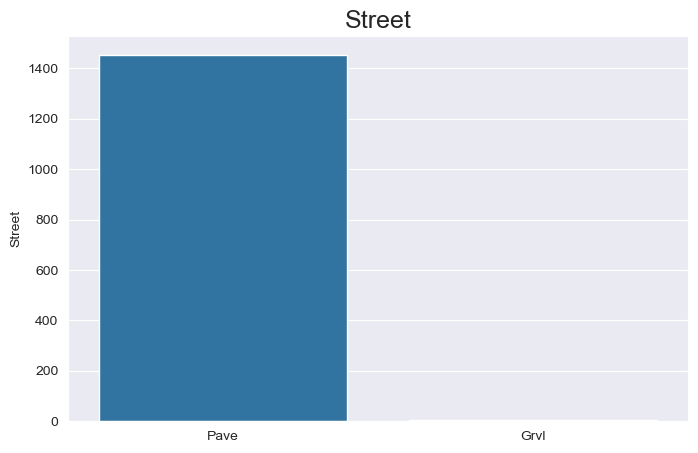

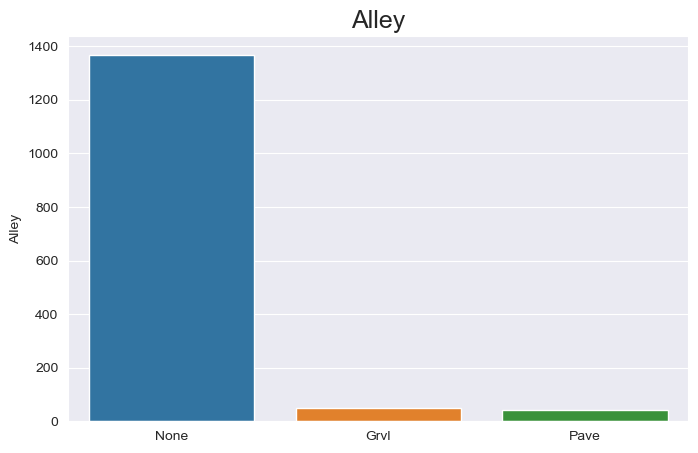

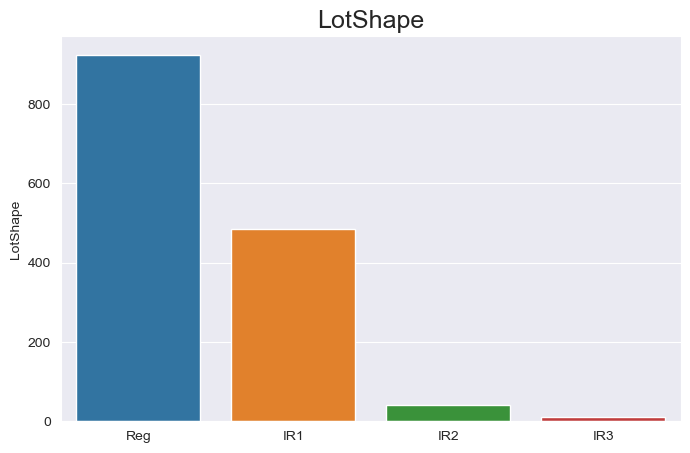

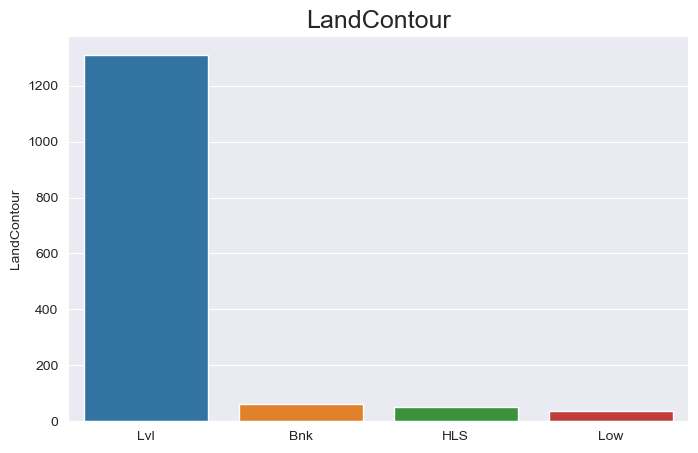

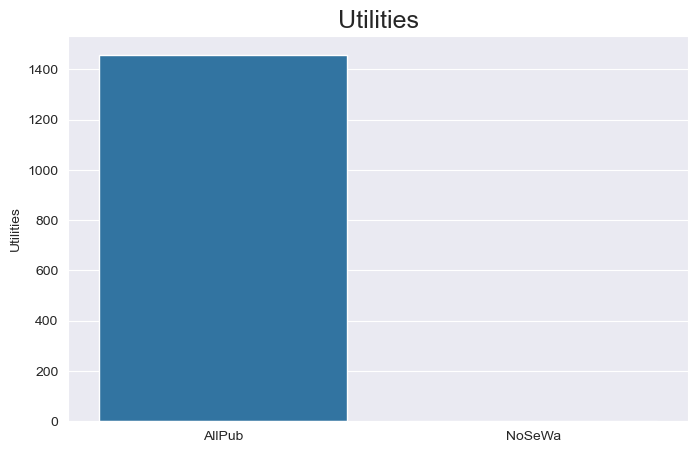

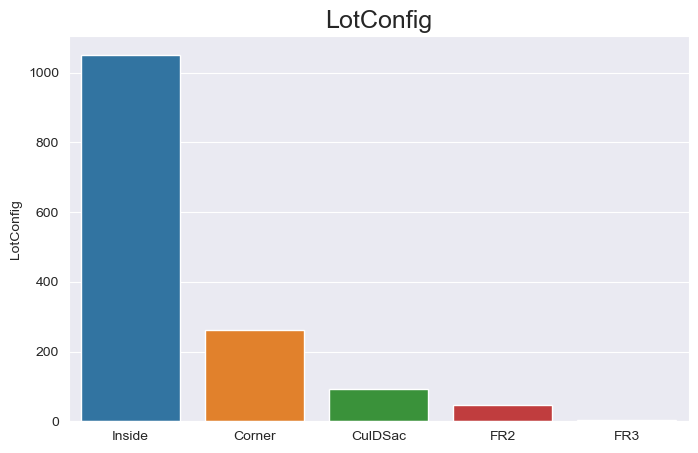

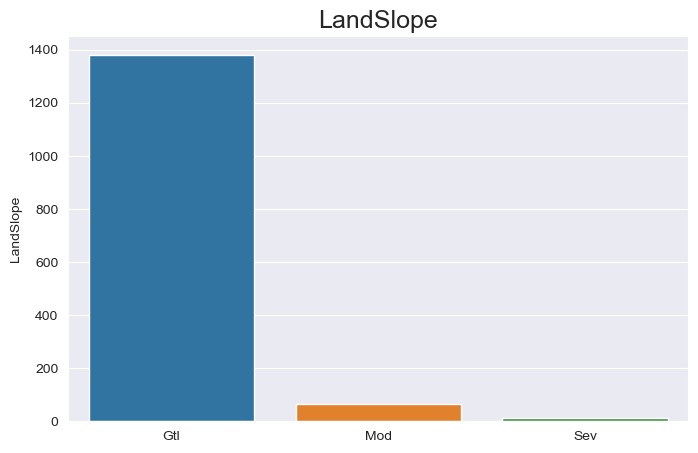

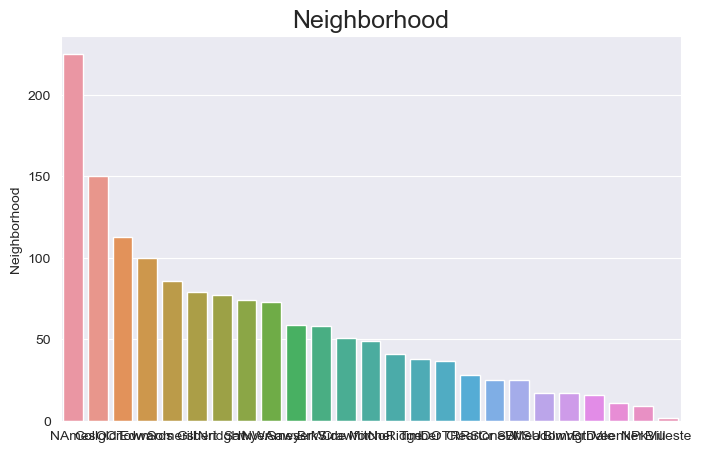

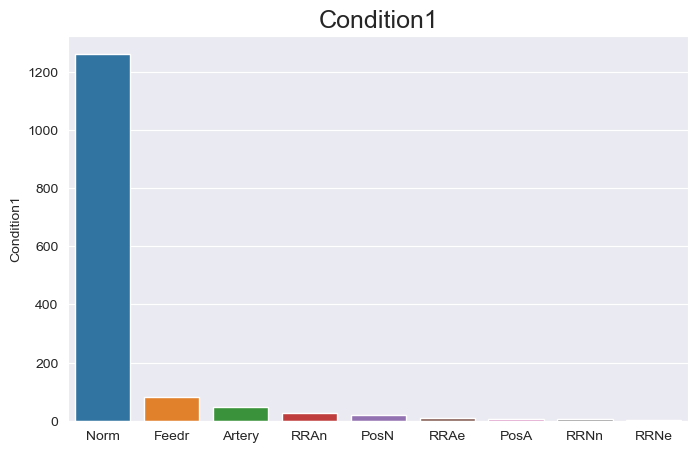

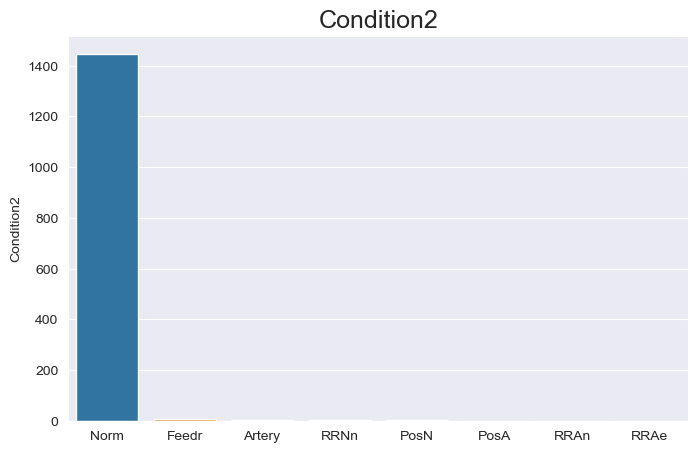

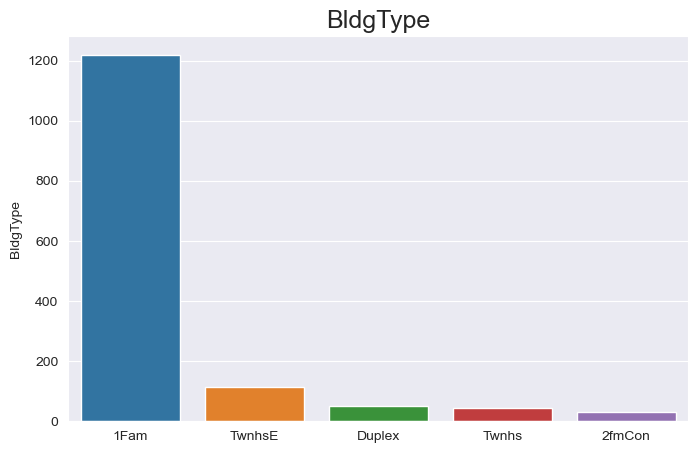

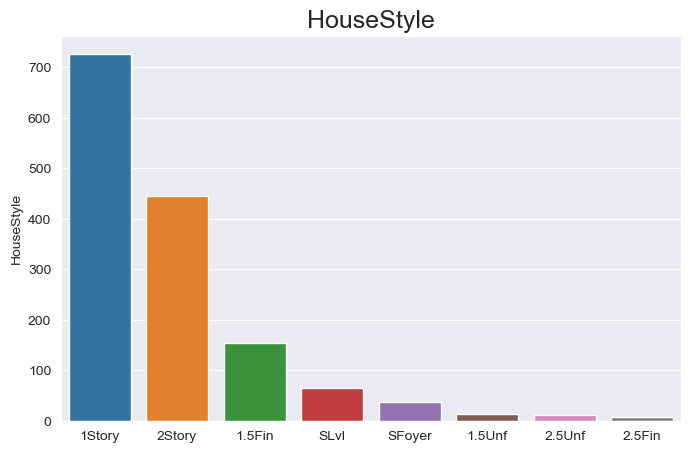

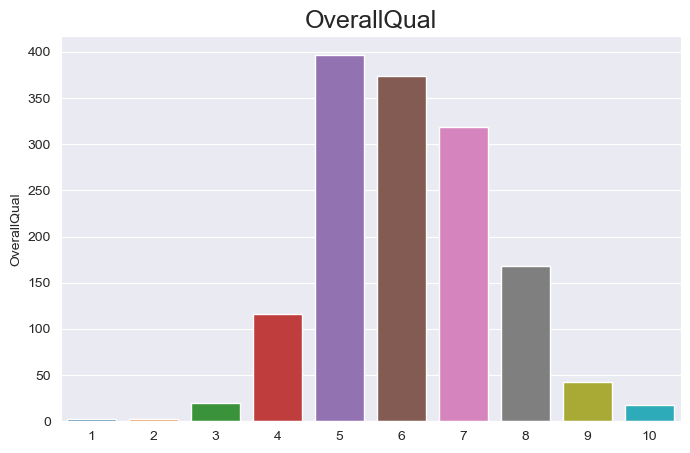

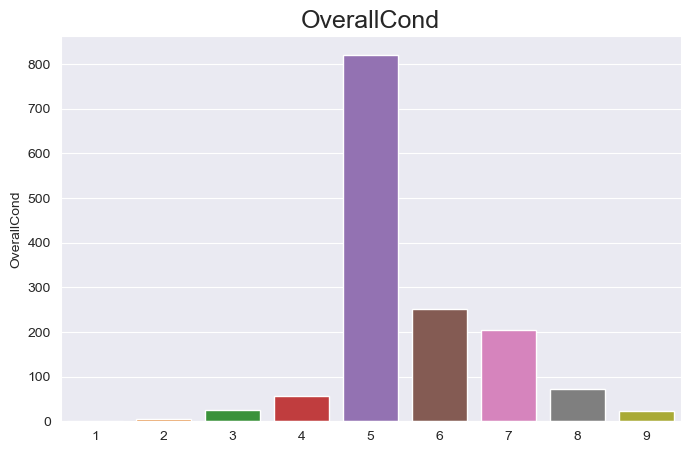

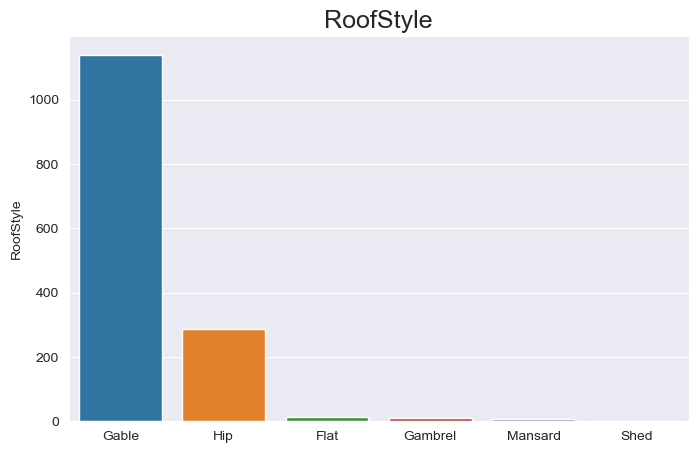

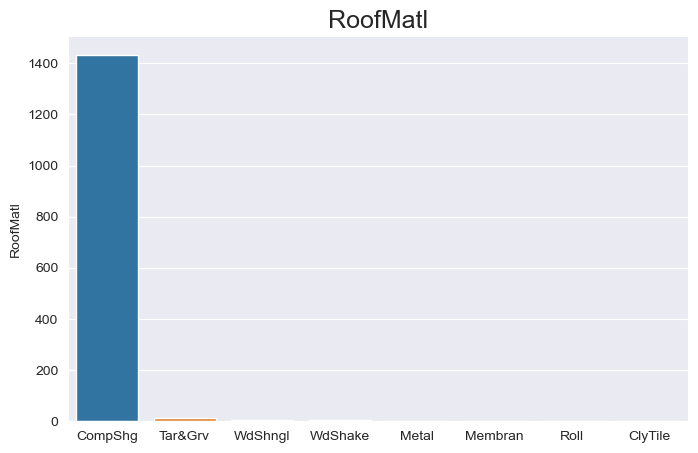

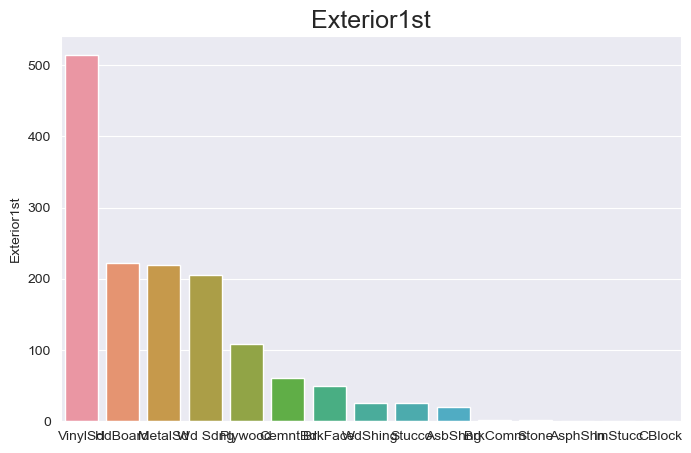

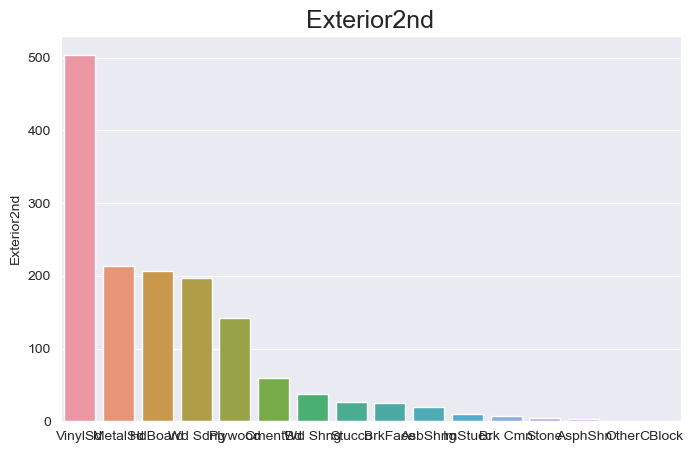

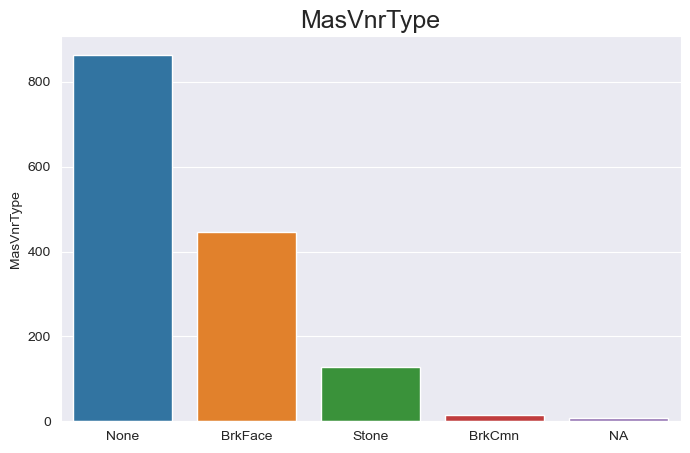

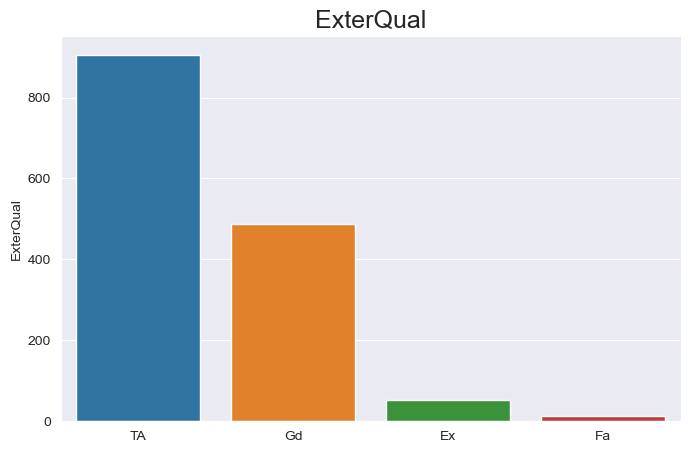

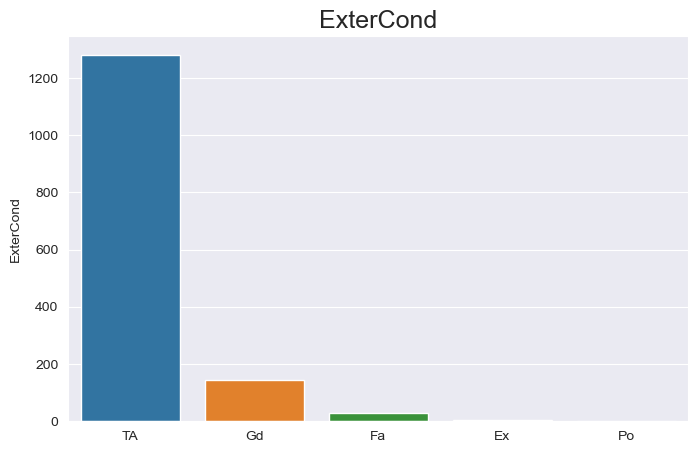

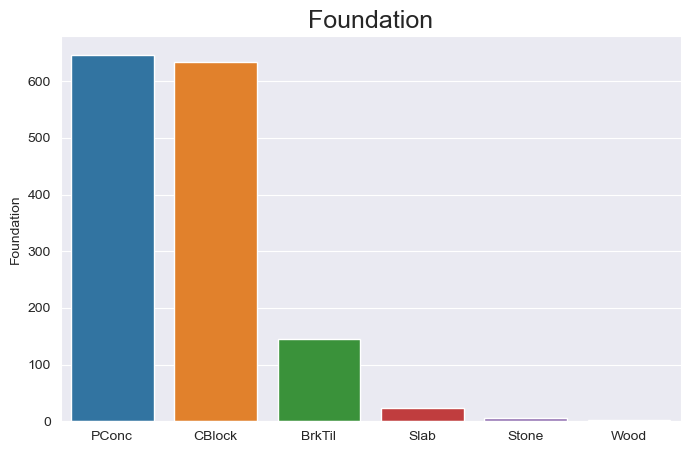

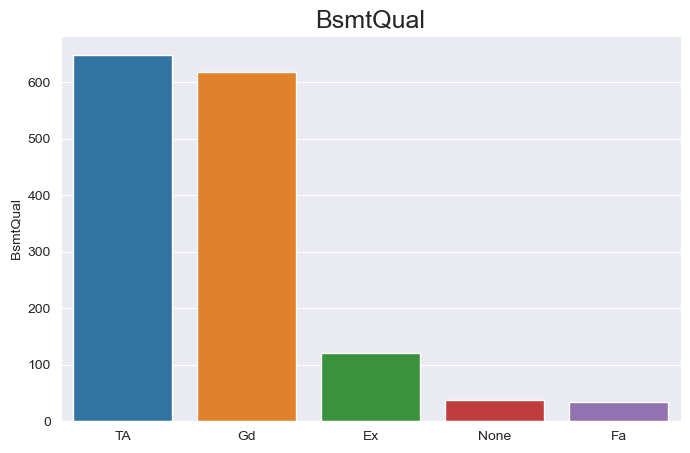

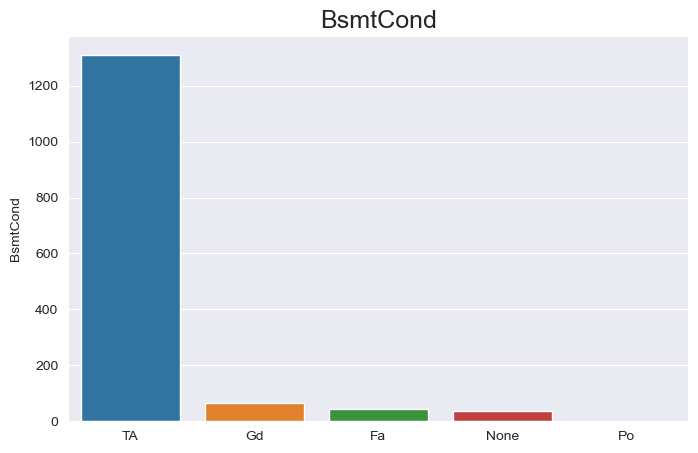

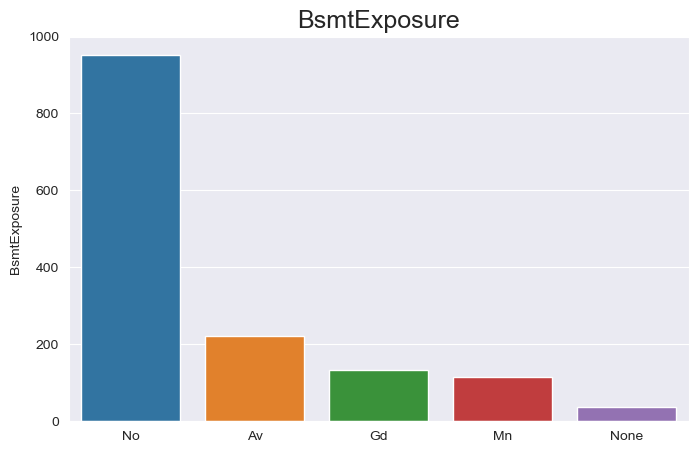

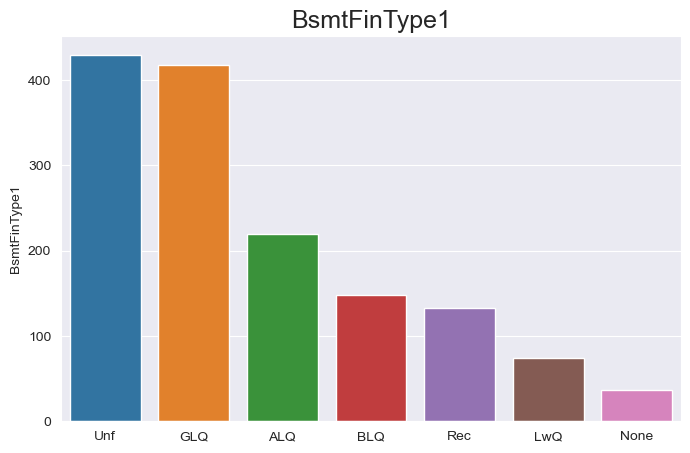

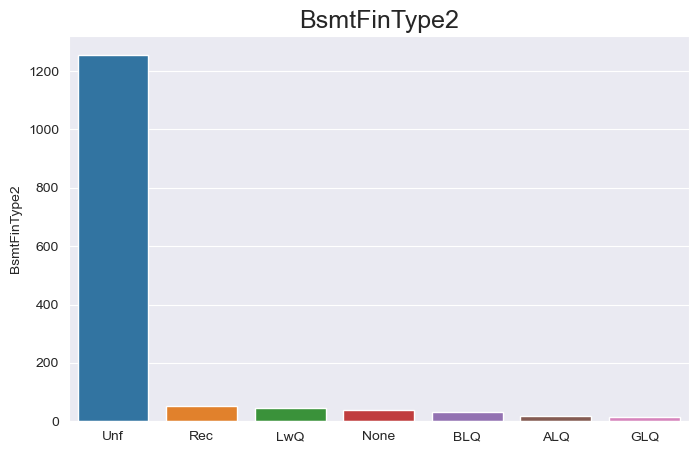

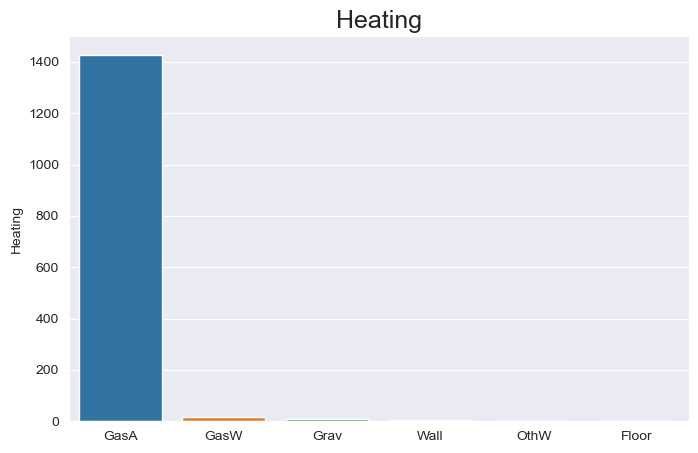

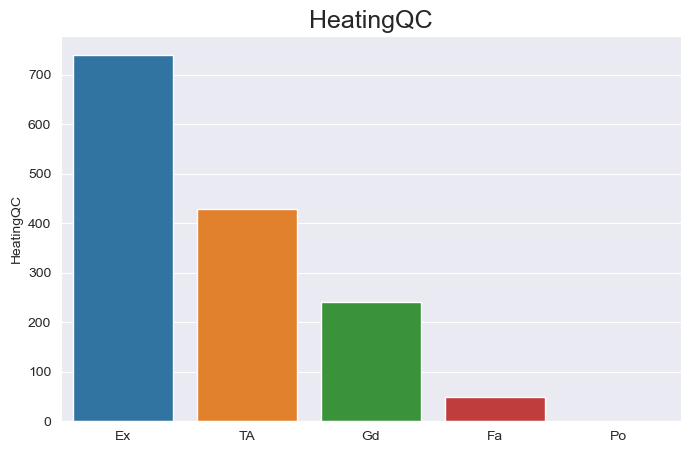

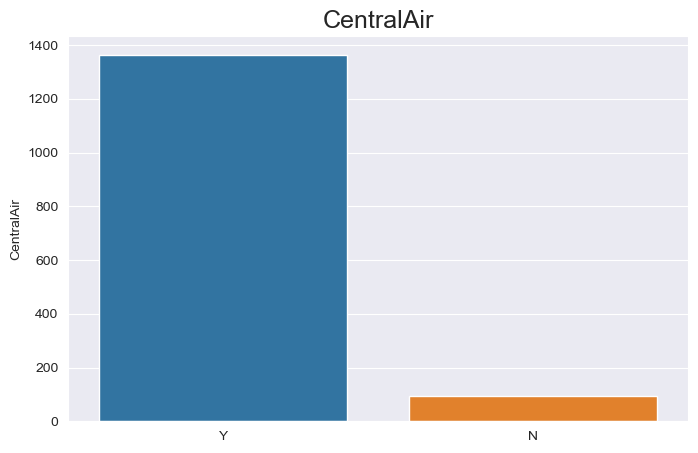

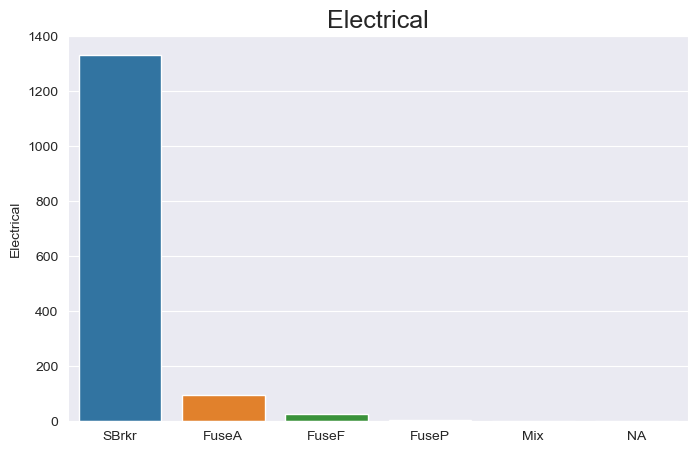

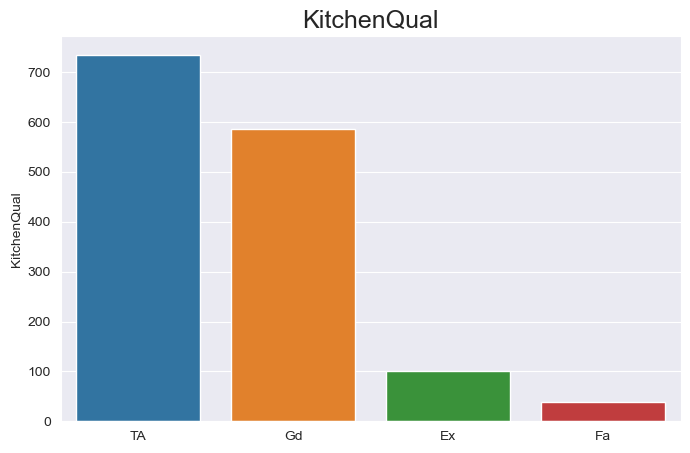

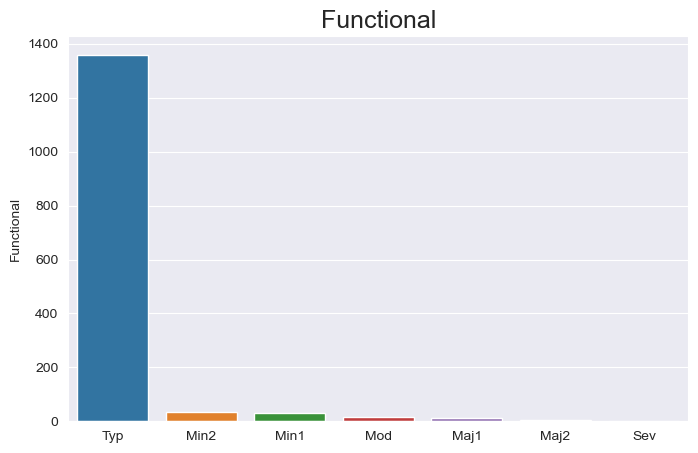

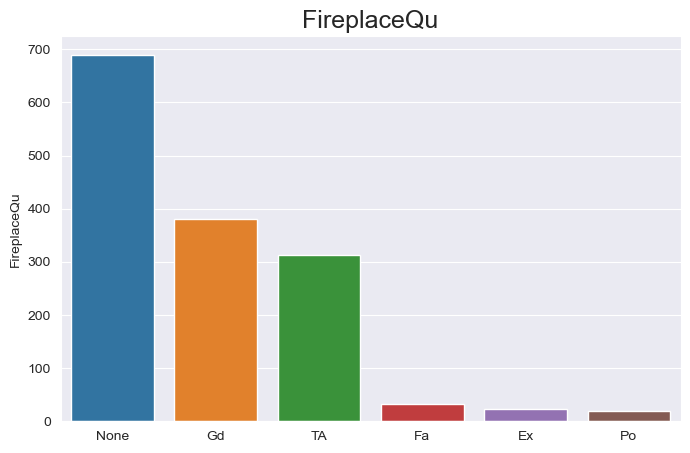

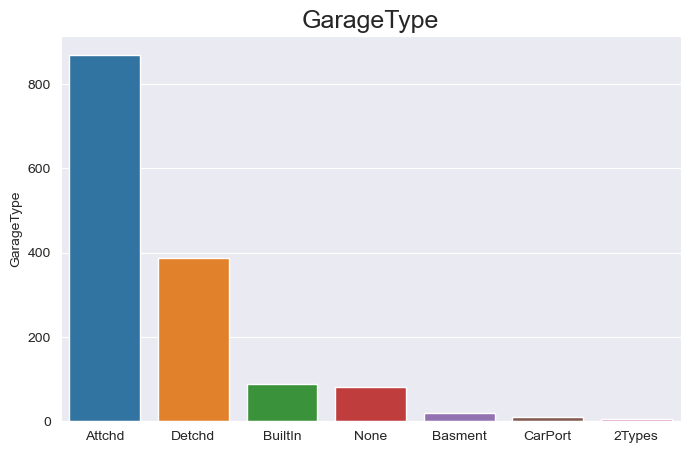

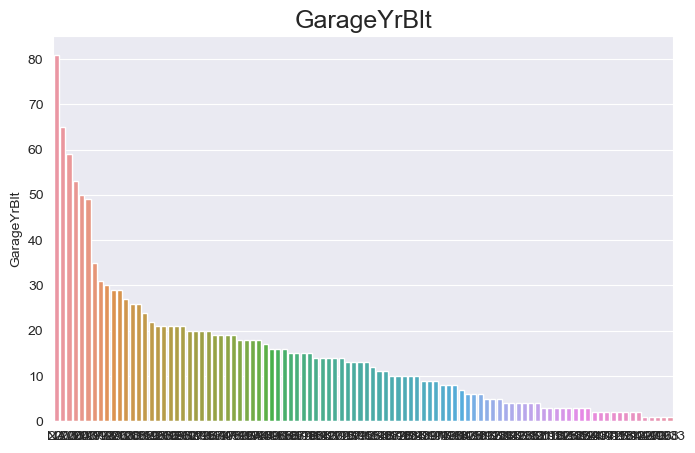

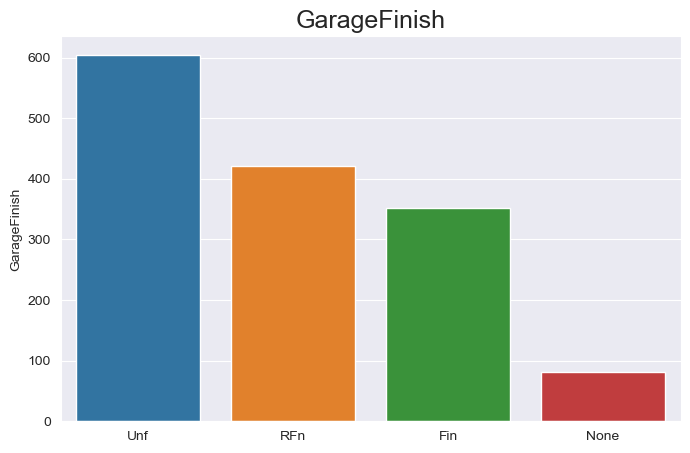

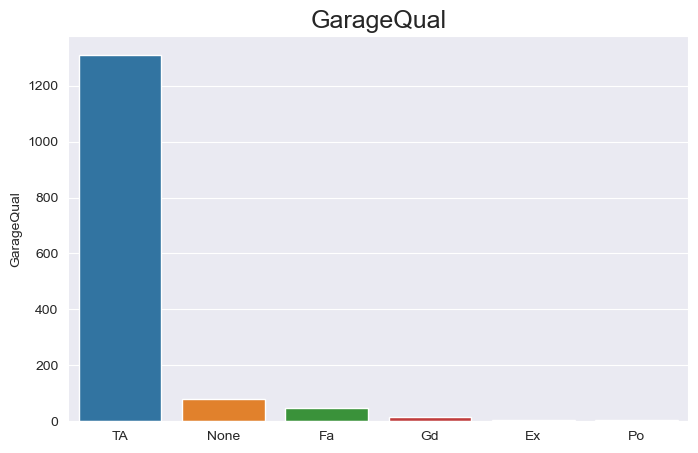

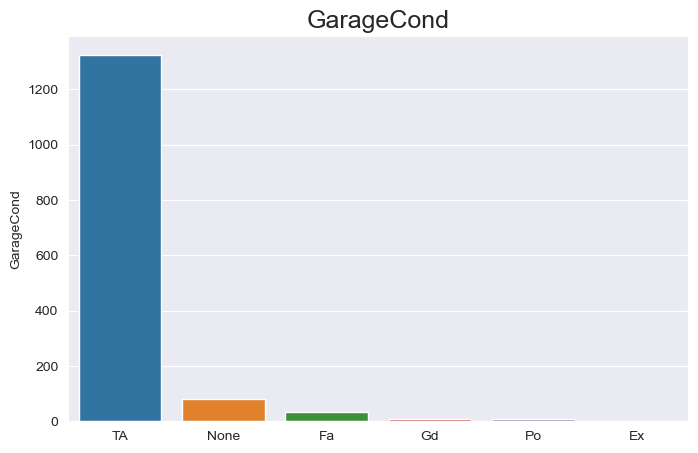

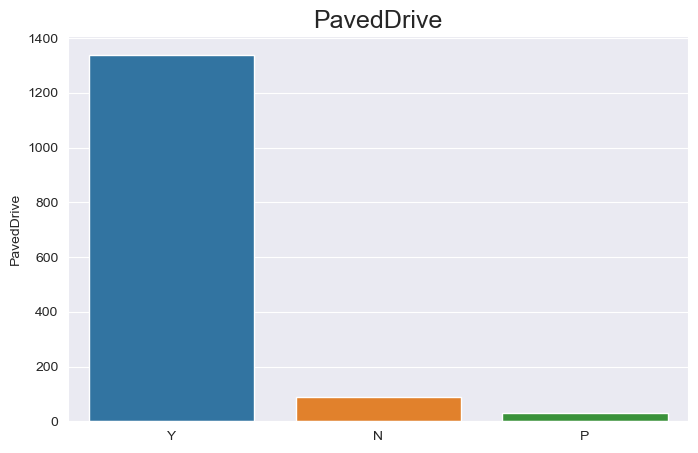

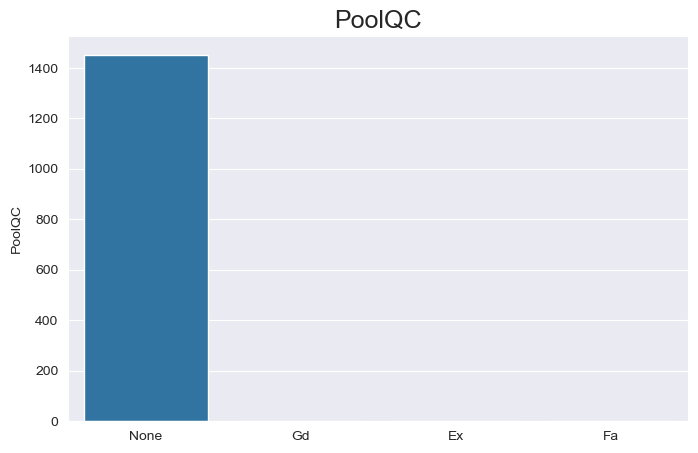

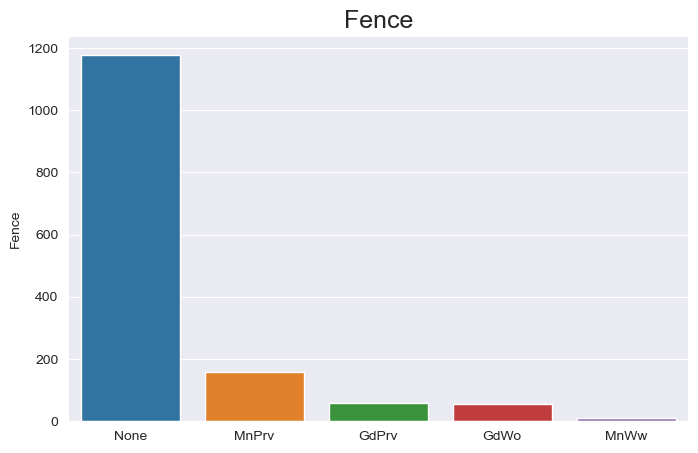

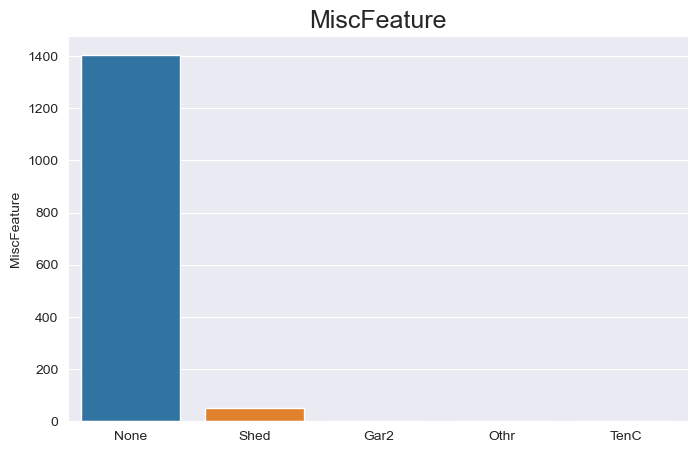

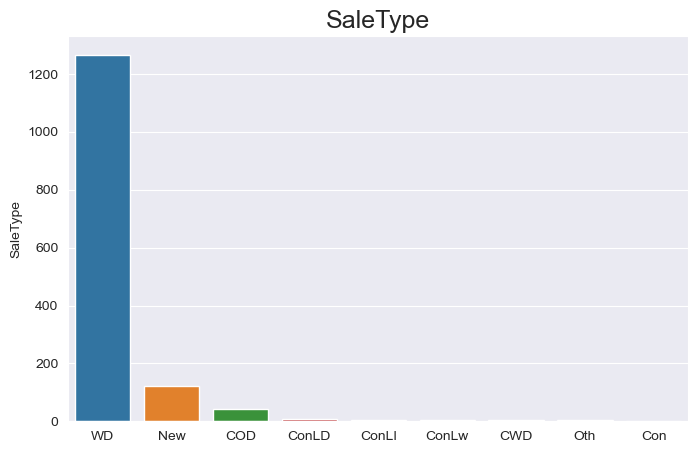

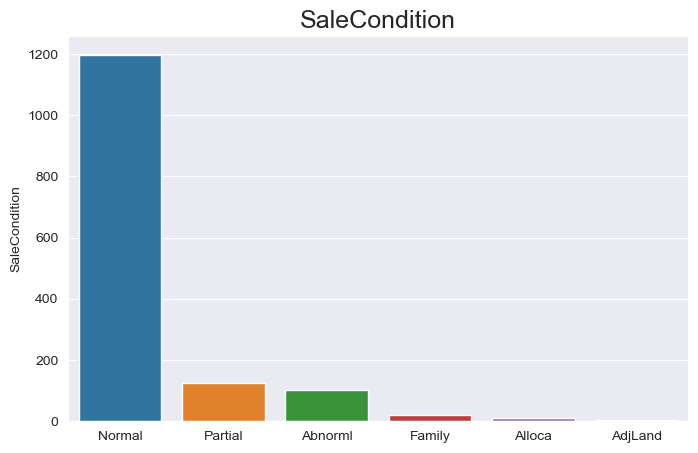

In [29]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    visualization_barplot(col)

###  So we observe from above value counts and bar plots that there is no column with single unique value that we could remove.

## <font color=palevioletred>Bivariate Analysis</font>

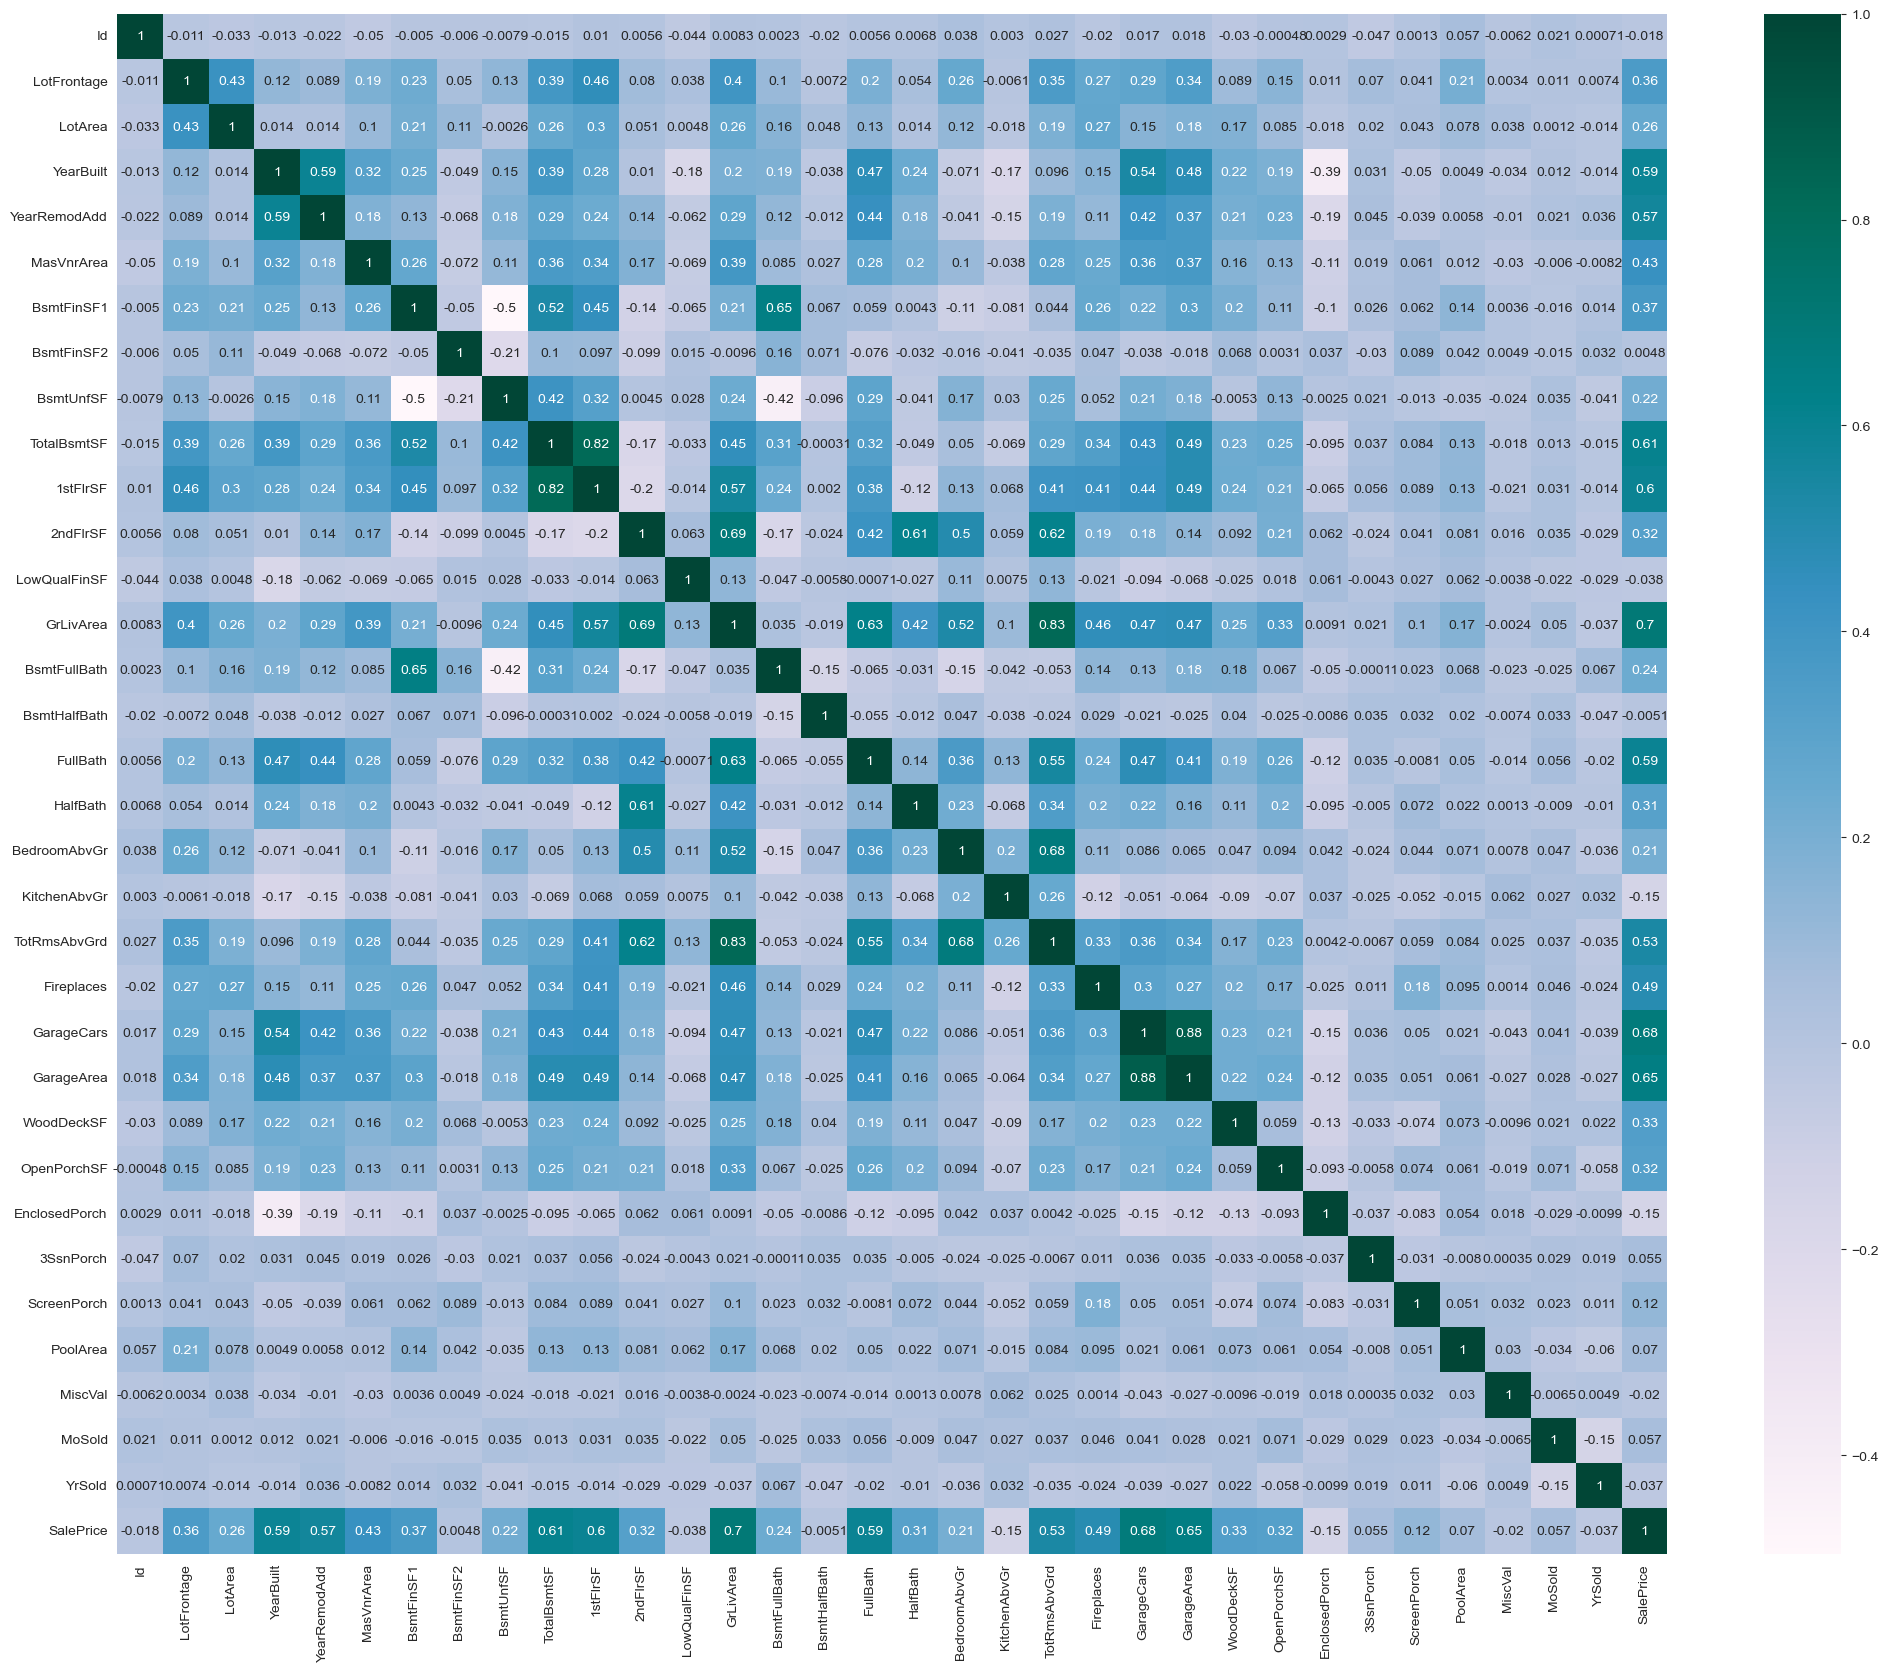

In [30]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='PuBuGn');

### - Many columns are highly correlated with each other.  
### - Target variable `SalePrice` is highly correlated with `GrLivArea`, `GarageCars` and `GarageArea`.  
### - As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

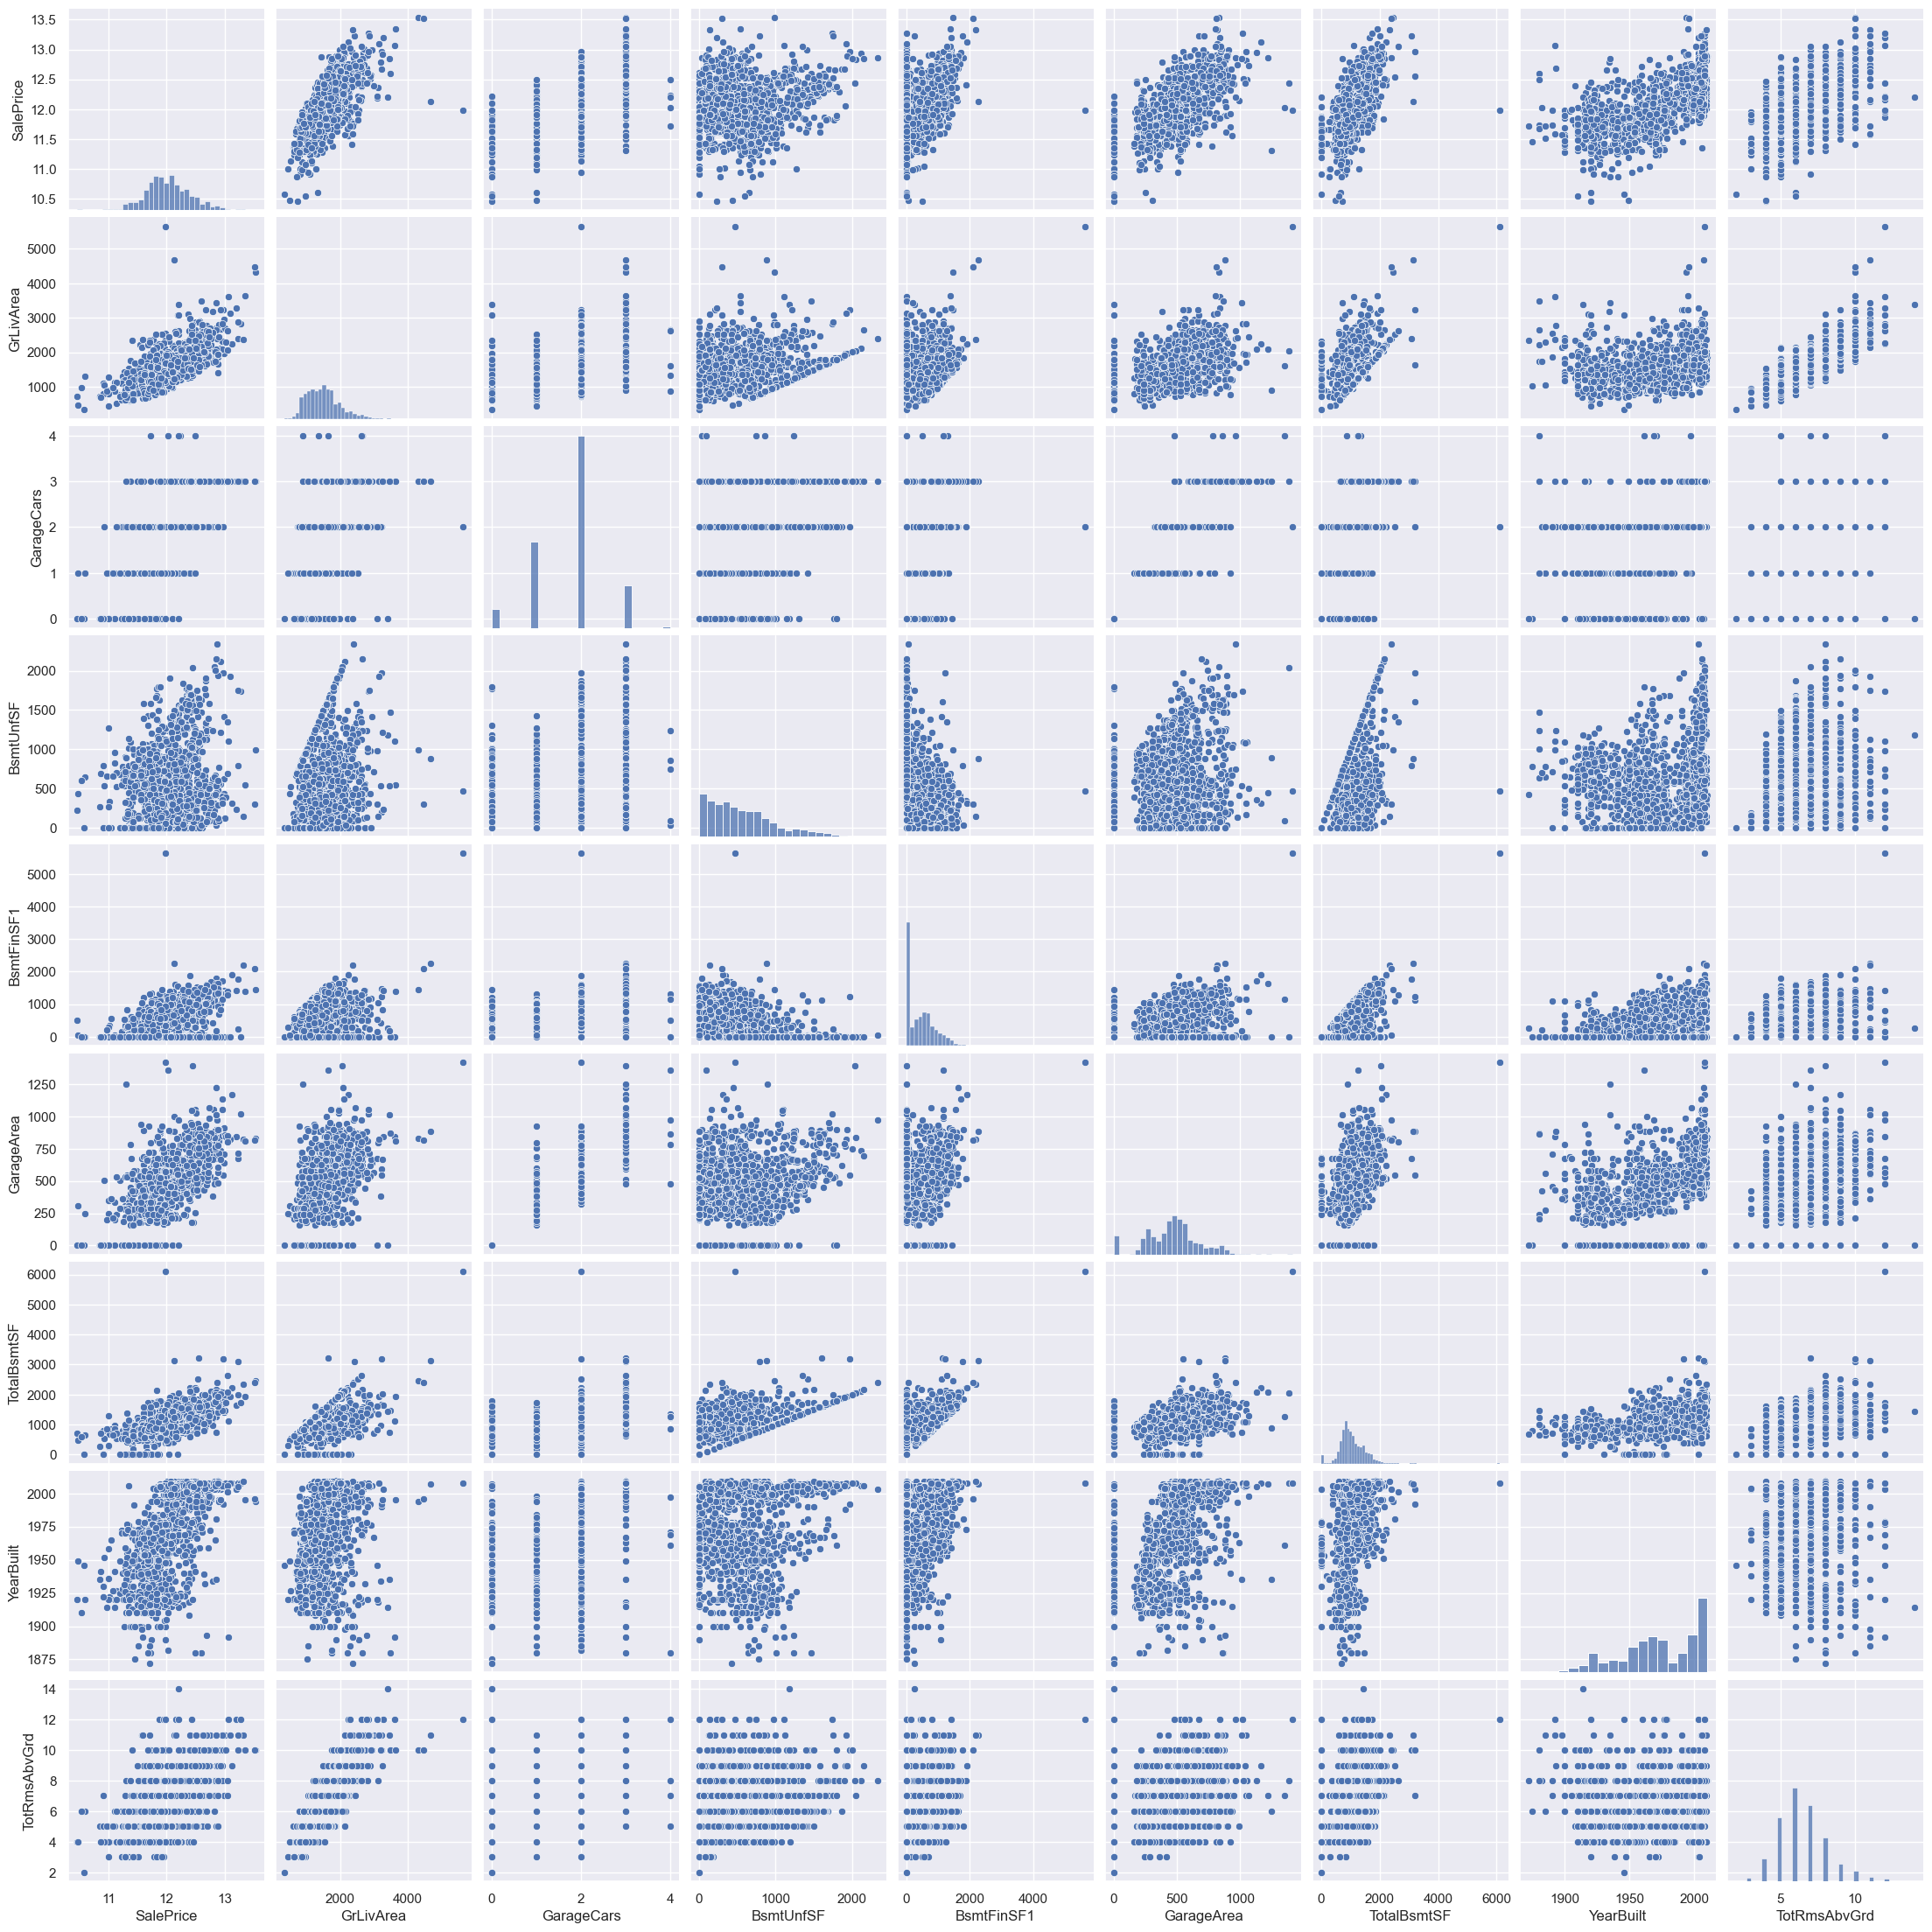

In [31]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [32]:
### Drop columns that are correlated and not contributing to 'SalePrice'
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    

df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           7           5       2003   
1       Norm     1Fam     1Story           6           8       1976   
2       Norm     1Fam     2Story           7           5       2001   
3       Norm     1Fam     2Story           7           5       1915   
4       Norm     1Fam     2Story           8           5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ           1        

# <font color=cornflowerblue>Step 3:  Feature Engineering </font>

In [33]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [34]:
## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [35]:
## View the dataframe again
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC  \
0         706          Unf           0          856    GasA        Ex   
1         978          Unf           0         1262    GasA        Ex   
2         486          Unf           0          920    GasA        Ex   
3         216          Unf           0          756    GasA        Gd   
4         655          Unf           0         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0          Gd        Typ           0        None     Attchd          RFn   
1          TA        Typ           1          TA     Attchd          RFn   
2          Gd        Typ           1          TA     Attchd          RFn   
3          Gd        Typ           1          Gd     Detchd          Unf   
4          Gd        Typ           1         

# <font color=cornflowerblue>Step 4:  Data Preprocessing </font>

## <font color=palevioletred>Missing Value Treatment</font>

In [36]:
## View the missing values in all features
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

###  There are missing values only in two columns `LotFrontage` and `MasVnrArea`       
###  As they are numerical columns, we will replace the missing values by mean value of the respective columns

In [37]:
## Replacing missing values in the above meniioned two columns by their median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [38]:
## Check for missing values again 
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional  

### Now, our data is clean.

## <font color=palevioletred>Dummy Variable Creation</font>

In [39]:
## Separate the categorical and numerical features again from original dataframe
## (as we have added one feature and removed two from original data)
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [40]:
## One hot encoding the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [41]:
## Check the dimensions
df_cat_encoded.shape

(1460, 256)

## <font color=palevioletred>Outlier treatment</font>

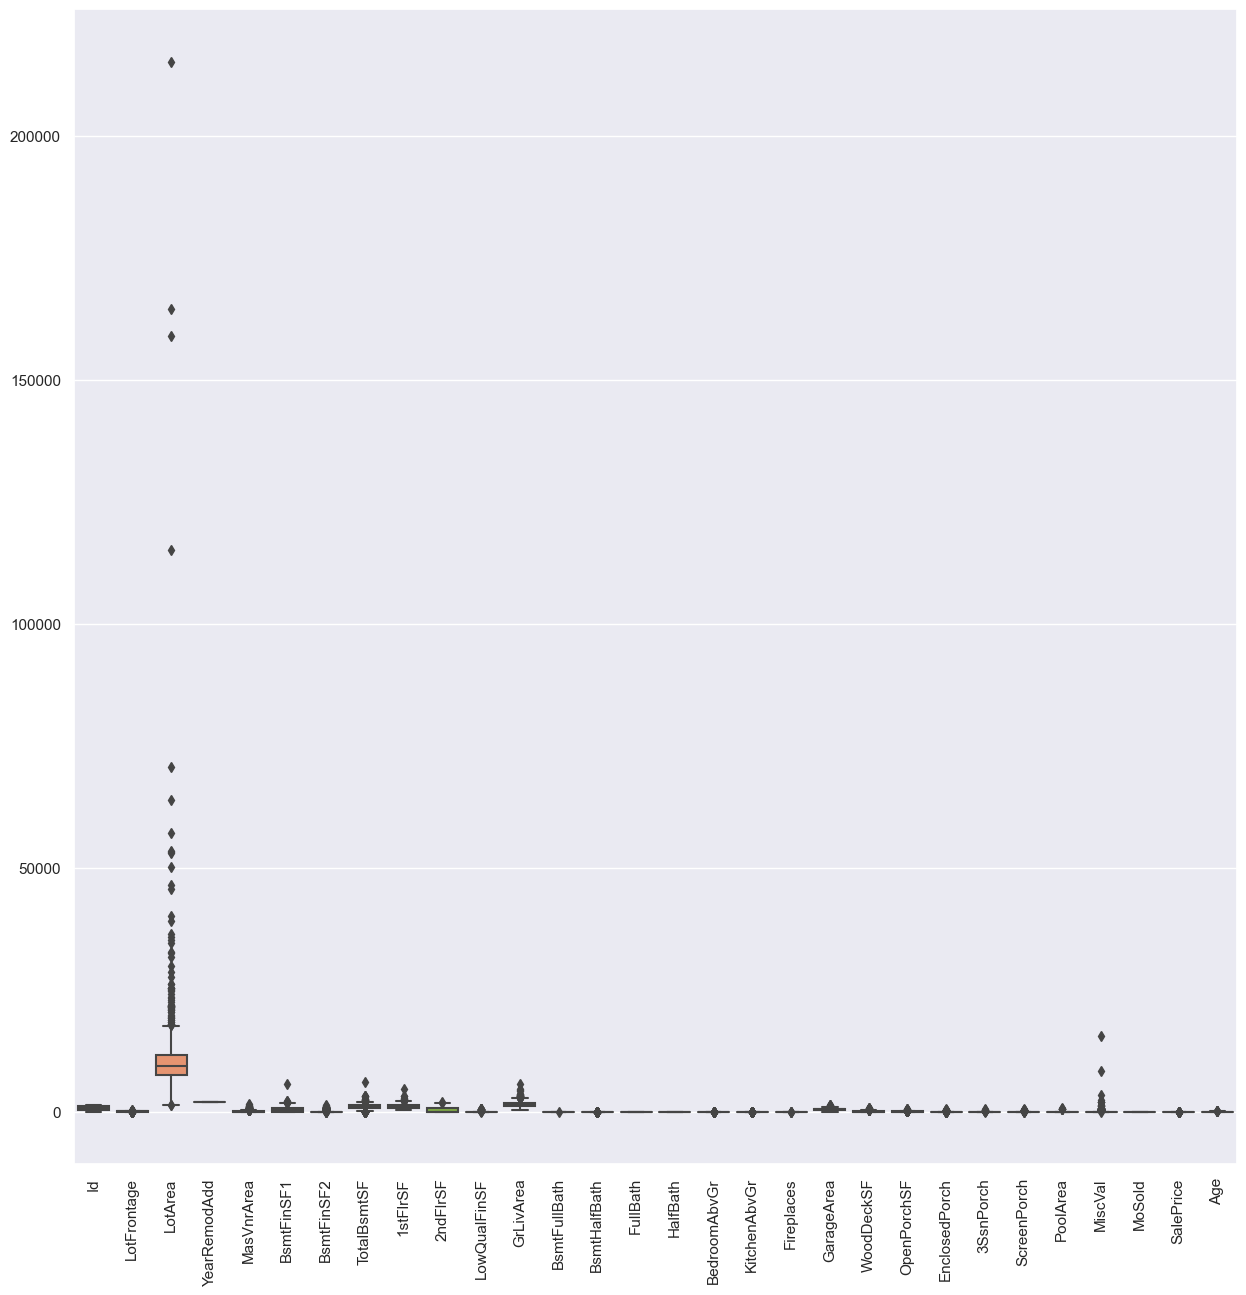

In [42]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [43]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

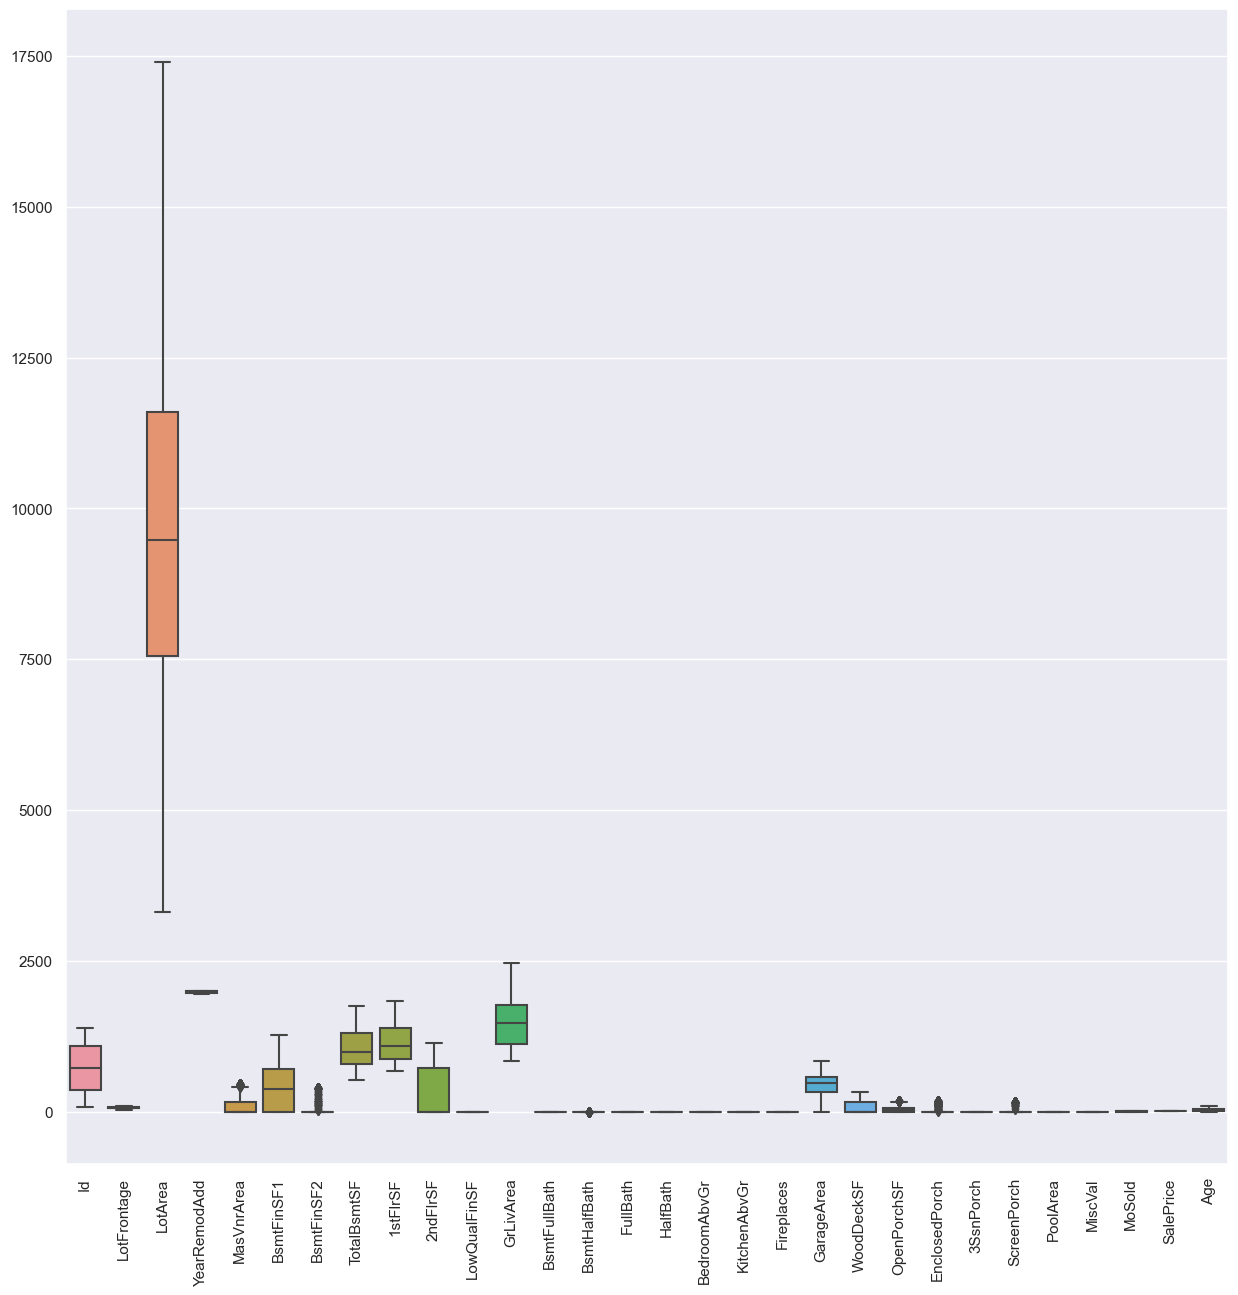

In [44]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

###  So, we have removed outliers from all numerical columns

In [45]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0         0.0        856.0     856.0     854.0             0     1710.0   
1         0.0       1262.0    1262.0       0.0             0     1262.0   
2         0.0        920.0     920.0     866.0             0     1786.0   
3         0.0        756.0     961.0     756.0             0     1717.0   
4         0.0       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0       548.0           0         61.0           0.00          0   
1           1       460.0         298          0.0           0.00          0   
2           1       608.0           0         42.0           0.00          0   
3           1       642.0           0         35.0         180.15          0   
4           1       836.0         192         84.0           0.00          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  Age  MSSubClass_30  \
0            0         0        0       2  12.247694    5              0   
1            0         0        0       5  12.109011   31              0   
2            0         0        0       9  12.317167    7              0   
3            0         0        0       2  11.849398   91              0   
4            0         0        0      11  12.429216    8              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0              0              0              0               0   
4              0              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  \
0            1            0            1           1           0   
1            1            0            1           1           0   
2            1            0            1          

###  Now, our dataframe is ready for model building

# <font color=cornflowerblue>Step 5:  Model Building, Tuning and Evaluation </font>

## <font color=palevioletred>Split the Data into Dependent and Independent variables</font>

In [46]:
## X contains all independent variables use to make predictions except 'Id' (not useful) and 'SalePrice' (target variable)
X = df.drop(["Id", "SalePrice"], axis=1)
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        856.0     856.0     854.0             0     1710.0             1   
1       1262.0    1262.0       0.0             0     1262.0             0   
2        920.0     920.0     866.0             0     1786.0             1   
3        756.0     961.0     756.0             0     1717.0             1   
4       1145.0    1145.0    1053.0             0     2198.0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0             0         2         1             3             1           0   
1             1         2         0             3             1           1   
2             0         2         1             3             1           1   
3             0         1         0             3             1           1   
4             0         2         1             4             1           1   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       548.0           0         61.0           0.00          0            0   
1       460.0         298          0.0           0.00          0            0   
2       608.0           0         42.0           0.00          0            0   
3       642.0           0         35.0         180.15          0            0   
4       836.0         192         84.0           0.00          0            0   

   PoolArea  MiscVal  MoSold  Age  MSSubClass_30  MSSubClass_40  \
0         0        0       2    5              0              0   
1         0        0       5   31              0              0   
2         0        0       9    7              0              0   
3         0        0       2   91              0              0   
4         0        0      11    8              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  \
0            1            0            1           1           0   
1            1            0            1           1           0   
2            1            0            1           1           0   
3            1            0            1           1           0   
4            1     

In [47]:
## Separate out the target variable as y which we want to predict
y = df["SalePrice"]
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## <font color=palevioletred>Train - Test Split</font>

In [48]:
## Splitting X and y into 70% train data and 30% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, test_size=0.3, random_state=100, shuffle=True)

In [49]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1021, 284)
(1021,)


In [50]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(438, 284)
(438,)


## <font color=palevioletred>Scaling numerical columns</font>

In [51]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [52]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [53]:
X_train.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
210     -0.106787 -1.170115     -1.697583   -0.650325    0.082728   -0.332312   
318      1.275349  0.073241      0.396163    1.158620    1.341089   -0.332312   
239     -1.008180 -0.262199     -1.697583   -0.650325   -0.824068   -0.332312   
986     -0.587530 -1.255205      0.883081   -0.650325   -1.051979   -0.332312   
1416    -0.527437  0.490009     -1.697583   -0.650325   -1.051979   -0.332312   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
210     -0.552365 -0.862759 -0.808093           0.0  -1.419680      1.160658   
318      0.815810  0.637526  1.961881           0.0   2.170467      1.160658   
239     -0.917778 -1.057678  0.864500           0.0  -0.023599     -0.861580   
986     -1.528782 -0.458154  0.730984           0.0   0.308054     -0.861580   
1416    -0.798806  0.265408  1.726285           0.0   1.775844     -0.861580   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
210       -0.24987 -1.106526 -0.763509     -1.329384           0.0   
318       -0.24987  0.903729  1.309743      1.710484           0.0   
239       -0.24987 -1.106526  1.309743      0.190550           0.0   
986       -0.24987 -1.106526 -0.763509     -1.329384           0.0   
1416      -0.24987  0.903729 -0.763509      1.710484           0.0   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
210    -0.939097   -2.319875   -0.801765    -0.809331       1.462645   
318     0.645726    0.938660    2.271410     0.314757       2.390188   
239     0.645726   -1.227074   -0.801765     1.813541      -0.392443   
986    -0.939097   -1.053219    2.271410    -0.809331      -0.392443   
1416   -0.939097    0.461801   -0.801765    -0.809331       1.810473   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold       Age  \
210         0.0    -0.285455       0.0      0.0 -0.884870  1.618731   
318         0.0    -0.285455       0.0      0.0 -0.884870 -0.690073   
239         0.0    -0.285455       0.0      0.0 -0.884870  0.998456   
986         0.0    -0.285455       0.0      0.0 -0.111697  1.894409   
1416        0.0    -0.285455       0.0      0.0 -0.884870  1.894409   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
210               1              0              0              0   
318               0              0              0              0   
239               0              0              0              1   
986               0              0              0              1   
1416              0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
210               0              0              0              0   
318               1              0              0              0   
239               0              0              0              0   
986               0              0              0              0   
1416              0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
210               0              0               0               0   
318               0              0               0               0   
239               0              0               0               0   
986               0              0               0               0   
1416              0              0               0               0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
210                0               0            0            0            1   
318                0               0            0            0            1   
239                0               0            0            0            1   
986                0               0            0            0            0   
1416               0               1            0            0            0   

      MSZoning_RM  Street_Pave  Alley_None 

In [54]:
X_test.head()

LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
1436    -0.527437 -0.187238     -0.675056   -0.650325    0.441567   -0.332312   
57       1.215256  0.578283      0.931773   -0.650325   -1.051979   -0.332312   
780     -0.347158 -0.512838      0.542239   -0.381810   -1.051979   -0.332312   
382      0.614327 -0.116330      1.029156   -0.650325   -1.051979   -0.332312   
1170     0.434049  0.067453     -0.382905   -0.650325    0.213656   -0.332312   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1436    -0.552365 -0.862759 -0.808093           0.0  -1.419680     -0.861580   
57      -0.563695 -0.874572  1.279613           0.0   0.498531     -0.861580   
780      0.504218  0.286081 -0.808093           0.0  -0.547970     -0.861580   
382     -0.339915 -0.641260  1.274758           0.0   0.671080     -0.861580   
1170     0.104813 -0.112617 -0.808093           0.0  -0.850491      1.160658   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1436      -0.24987 -1.106526 -0.763509       0.19055           0.0   
57        -0.24987  0.903729  1.309743       0.19055           0.0   
780       -0.24987  0.903729 -0.763509       0.19055           0.0   
382       -0.24987  0.903729  1.309743       0.19055           0.0   
1170      -0.24987 -1.106526 -0.763509       0.19055           0.0   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1436   -0.939097    0.302848   -0.801765    -0.809331      -0.392443   
57     -0.939097    0.486637   -0.801765     0.502105      -0.392443   
780     0.645726   -0.323029    1.216439    -0.415901      -0.392443   
382    -0.939097    0.854216    0.519241     0.183613      -0.392443   
1170    0.645726   -0.541590    1.060487    -0.809331      -0.392443   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold       Age  \
1436        0.0    -0.285455       0.0      0.0 -0.498284 -0.000878   
57          0.0    -0.285455       0.0      0.0  0.661475 -1.172509   
780         0.0    -0.285455       0.0      0.0 -0.111697 -0.827912   
382         0.0    -0.285455       0.0      0.0 -0.884870 -1.206969   
1170        0.0    -0.285455       0.0      0.0  0.274889 -0.173176   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1436              0              0              0              0   
57                0              0              0              0   
780               0              0              0              0   
382               0              0              0              0   
1170              0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
1436              0              0              0              0   
57                1              0              0              0   
780               0              0              0              0   
382               1              0              0              0   
1170              0              0              0              1   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
1436              0              0               0               0   
57                0              0               0               0   
780               0              0               0               0   
382               0              0               0               0   
1170              0              0               0               0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1436               0               0            0            0            1   
57                 0               0            0            0            1   
780                0               0            0            0            1   
382                0               0            0            0            1   
1170               0               0            0            0            1   

      MSZoning_RM  Street_Pave  Alley_None 

## <font color=palevioletred>Model 1: Ridge Regression</font>

In [55]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [56]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 7.0}

In [58]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.02193432, 0.02222857, 0.02532511, 0.03131032, 0.02791419,
        0.02103505, 0.01554718, 0.02133603, 0.01536336, 0.00956812,
        0.01275678, 0.0095674 , 0.00956783, 0.        , 0.01275768,
        0.        , 0.01276264, 0.00309205, 0.0061841 , 0.00637903,
        0.00637903, 0.00956783, 0.00318928, 0.00956726, 0.00318909,
        0.0095674 , 0.00318913, 0.00957012]),
 'std_fit_time': array([0.00794435, 0.00789354, 0.00765989, 0.00020541, 0.0062274 ,
        0.00724323, 0.00048815, 0.00781187, 0.00020285, 0.00781234,
        0.00637839, 0.00781175, 0.0078121 , 0.        , 0.00637884,
        0.        , 0.00638132, 0.0061841 , 0.00757395, 0.00781269,
        0.00781269, 0.0078121 , 0.00637856, 0.00781164, 0.00637817,
        0.00781175, 0.00637827, 0.00781397]),
 'mean_score_time': array([0.00318937, 0.00319042, 0.0063798 , 0.00298986, 0.00597973,
        0.006179  , 0.00956736, 0.00309296, 0.00628233, 0.00637875,
        0.00318913, 0.        , 0.003189

###  Thus, we get optimum value of alpha as 7. Now we will build a ridge regression model using this value.

In [59]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=7)

In [60]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=7)

In [61]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 5.54341893e-03,  2.43720222e-02,  2.85895749e-02, -8.60295438e-04,
        1.94120677e-02,  3.27670089e-03,  5.05395906e-02,  2.18037467e-03,
        3.02674384e-02,  0.00000000e+00,  9.03129482e-02,  9.46421111e-03,
       -1.14202847e-03,  1.11201943e-02,  1.01365633e-02, -2.61537264e-04,
        0.00000000e+00,  8.22371890e-03,  3.02835974e-02,  1.11380752e-02,
        5.51360832e-03,  1.48583463e-03,  0.00000000e+00,  4.95769161e-03,
        0.00000000e+00,  0.00000000e+00,  1.41519453e-03, -5.38048209e-02,
       -3.63480711e-02, -1.11328676e-02,  1.55194889e-03,  2.05087452e-03,
       -1.71491654e-02,  4.87724007e-02,  3.08887644e-02, -4.71618690e-03,
        1.30358490e-02, -3.32629231e-02,  7.62739035e-03, -4.59580744e-02,
       -3.30695355e-02, -2.61694209e-02,  4.20824727e-02,  2.87469758e-02,
        2.46843406e-02, -1.17138191e-02, -6.89334885e-03, -3.18877312e-03,
        1.85547824e-02,  1.18675926e-03, -1.79980758e-02,  4.37201418e-03,
        1.57060312e-02,  

In [62]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [63]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.90
RSS (Train) = 6.41
RSS (Test) = 5.59
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.11


### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [64]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.021934      0.007944         0.003189        0.006379      0.0001   
1        0.022229      0.007894         0.003190        0.006381       0.001   
2        0.025325      0.007660         0.006380        0.007814        0.01   
3        0.031310      0.000205         0.002990        0.005980        0.05   
4        0.027914      0.006227         0.005980        0.007324         0.1   
5        0.021035      0.007243         0.006179        0.007574         0.2   
6        0.015547      0.000488         0.009567        0.007812         0.3   
7        0.021336      0.007812         0.003093        0.006186         0.4   
8        0.015363      0.000203         0.006282        0.007696         0.5   
9        0.009568      0.007812         0.006379        0.007812         0.6   
10       0.012757      0.006378         0.003189        0.006378         0.7   
11       0.009567      0.007812         0.000000        0.000000         0.8   
12       0.009568      0.007812         0.003189        0.006379         0.9   
13       0.000000      0.000000         0.000000        0.000000         1.0   
14       0.012758      0.006379         0.003189        0.006379         2.0   
15       0.000000      0.000000         0.000000        0.000000         3.0   
16       0.012763      0.006381         0.000000        0.000000         4.0   
17       0.003092      0.006184         0.003092        0.006184         5.0   
18       0.006184      0.007574         0.000000        0.000000         6.0   
19       0.006379      0.007813         0.003190        0.006379         7.0   
20       0.006379      0.007813         0.000000        0.000000         8.0   
21       0.009568      0.007812         0.000000        0.000000         9.0   
22       0.003189      0.006379         0.000000        0.000000        10.0   
23       0.009567      0.007812         0.003189        0.006378          20   
24       0.003189      0.006378         0.000000        0.000000          50   
25       0.009567      0.007812         0.006378        0.007812         100   
26       0.003189      0.006378         0.000000        0.000000         500   
27       0.009570      0.007814         0.006380        0.007814        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.086299          -0.086514   
1    {'alpha': 0.001}          -0.086195          -0.086494   
2     {'alpha': 0.01}          -0.085377          -0.086321   
3     {'alpha': 0.05}          -0.083636          -0.085704   
4      {'alpha': 0.1}          -0.082388          -0.085130   
5      {'alpha': 0.2}          -0.080800          -0.084162   
6      {'alpha': 0.3}          -0.079809          -0.083495   
7      {'alpha': 0.4}          -0.079023          -0.082993   
8      {'alpha': 0.5}          -0.078345          -0.082585   
9      {'alpha': 0.6}          -0.077756          -0.082243   
10     {'alpha': 0.7}          -0.077266          -0.081946   
11     {'alpha': 0.8}          -0.076812          -0.081682   
12     {'alpha': 0.9}          -0.076388          -0.081449   
13     {'alpha': 1.0}          -0.075995          -0.081236   
14     {'alpha': 2.0}          -0.073549          -0.079926   
15     {'alpha': 3.0}          -0.072386          -0.079209   
16     {'alpha': 4.0}          -0.071621          -0.078707   
17     {'alpha': 5.0}          -0.071072          -0.078409   
18     {'alpha': 6.0}          -0.070688          -0.078220   
19     {'alpha': 7.0}          -0.070476          -0.078152   
20     {'alpha': 8.0}          -0.070311          -0.078113   
21     {'alpha': 9.0}          -0.070209          -0.078096   
22    {'alpha': 10.0}          -0.070128          -0.078124   
23      {'alpha': 20}          -0.070200          -0.078803   
24      {'alpha': 50}          -0.072834          -0.082226   
25     {'alpha': 100}          -0.075877     

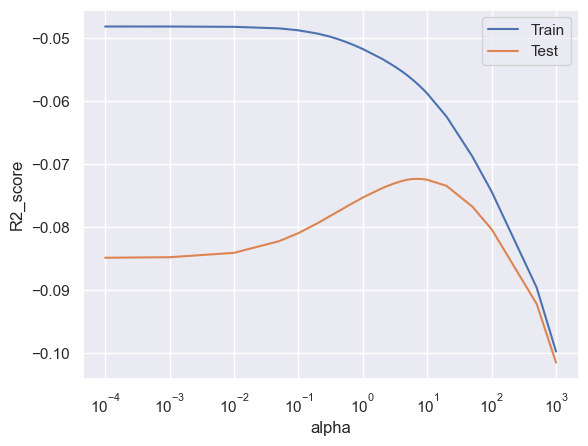

In [65]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

###  As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.
###  From graph also, it is apparent that the optimal value of alpha is 7.

## <font color=palevioletred>Model 2: Lasso<font>

In [66]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.0001}

In [68]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.04047856, 0.01535654, 0.01594734, 0.00956793, 0.00318923,
        0.00957026, 0.00638018, 0.00309219, 0.01236877, 0.00318971,
        0.01594596, 0.01594682, 0.00637941, 0.01275835, 0.01275859,
        0.00956869, 0.01275797, 0.01275816, 0.01275845, 0.01275806,
        0.01275883, 0.00637941, 0.01546001, 0.003092  , 0.01275692,
        0.00637846, 0.00598049, 0.00897074]),
 'std_fit_time': array([1.27584219e-02, 4.82387192e-04, 0.00000000e+00, 7.81218077e-03,
        6.37845993e-03, 7.81408850e-03, 7.81408850e-03, 6.18438721e-03,
        6.18438721e-03, 6.37941360e-03, 2.10241391e-06, 2.10241391e-06,
        7.81315409e-03, 6.37917521e-03, 6.37929441e-03, 7.81280370e-03,
        6.37898445e-03, 6.37907983e-03, 6.37922288e-03, 6.37903214e-03,
        6.37941360e-03, 7.81315409e-03, 0.00000000e+00, 6.18400574e-03,
        6.37845993e-03, 7.81198609e-03, 7.32457646e-03, 7.32457646e-03]),
 'mean_score_time': array([0.00318923, 0.        , 0.        , 0.        , 

### 📌 Thus, we get optimum value of alpha as 0.0001. Now we will build a lasso regression model using this value.

In [69]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.0001)

In [70]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [71]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 4.94790304e-03,  2.73436272e-02,  2.66292872e-02,  8.70892682e-04,
        1.81256023e-02,  3.76402575e-03,  5.41487917e-02, -0.00000000e+00,
        2.38706633e-02,  0.00000000e+00,  9.15713651e-02,  9.97828470e-03,
       -2.78903777e-03,  1.09086128e-02,  8.55170389e-03, -1.33160360e-03,
        0.00000000e+00,  6.31556422e-03,  2.89286569e-02,  1.12500457e-02,
        6.36490438e-03,  2.13210521e-03,  0.00000000e+00,  4.03531649e-03,
        0.00000000e+00,  0.00000000e+00,  9.12258437e-04, -7.16751567e-02,
       -3.74857511e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.69323996e-02,  4.17130241e-02,  1.31341963e-02, -0.00000000e+00,
        0.00000000e+00, -7.75460788e-02, -0.00000000e+00, -7.33776789e-02,
       -3.79855221e-02, -6.17453093e-02,  6.01276426e-02,  4.41741965e-02,
        3.16927860e-02,  0.00000000e+00, -0.00000000e+00, -1.60558236e-03,
        2.28418526e-02, -2.97654696e-03,  1.93441596e-02,  3.05855884e-03,
       -4.99101211e-03,  

In [72]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [73]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.96
R-Squared (Test) = 0.85
RSS (Train) = 5.25
RSS (Test) = 8.05
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.07
RMSE (Test) = 0.14


### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [74]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.040479      0.012758         0.003189        0.006378      0.0001   
1        0.015357      0.000482         0.000000        0.000000       0.001   
2        0.015947      0.000000         0.000000        0.000000        0.01   
3        0.009568      0.007812         0.000000        0.000000        0.05   
4        0.003189      0.006378         0.000000        0.000000         0.1   
5        0.009570      0.007814         0.006380        0.007814         0.2   
6        0.006380      0.007814         0.003092        0.006184         0.3   
7        0.003092      0.006184         0.012369        0.006184         0.4   
8        0.012369      0.006184         0.000000        0.000000         0.5   
9        0.003190      0.006379         0.003189        0.006378         0.6   
10       0.015946      0.000002         0.000000        0.000000         0.7   
11       0.015947      0.000002         0.000000        0.000000         0.8   
12       0.006379      0.007813         0.000000        0.000000         0.9   
13       0.012758      0.006379         0.000000        0.000000         1.0   
14       0.012759      0.006379         0.000000        0.000000         2.0   
15       0.009569      0.007813         0.003189        0.006379         3.0   
16       0.012758      0.006379         0.003189        0.006379         4.0   
17       0.012758      0.006379         0.003190        0.006379         5.0   
18       0.012758      0.006379         0.003190        0.006379         6.0   
19       0.012758      0.006379         0.003190        0.006379         7.0   
20       0.012759      0.006379         0.000000        0.000000         8.0   
21       0.006379      0.007813         0.003092        0.006184         9.0   
22       0.015460      0.000000         0.000000        0.000000        10.0   
23       0.003092      0.006184         0.000000        0.000000          20   
24       0.012757      0.006378         0.000000        0.000000          50   
25       0.006378      0.007812         0.000000        0.000000         100   
26       0.005980      0.007325         0.002990        0.005980         500   
27       0.008971      0.007325         0.000000        0.000000        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.073505          -0.079517   
1    {'alpha': 0.001}          -0.068821          -0.080280   
2     {'alpha': 0.01}          -0.089881          -0.102362   
3     {'alpha': 0.05}          -0.116017          -0.121818   
4      {'alpha': 0.1}          -0.162199          -0.162097   
5      {'alpha': 0.2}          -0.263805          -0.258895   
6      {'alpha': 0.3}          -0.301686          -0.293701   
7      {'alpha': 0.4}          -0.301686          -0.293701   
8      {'alpha': 0.5}          -0.301686          -0.293701   
9      {'alpha': 0.6}          -0.301686          -0.293701   
10     {'alpha': 0.7}          -0.301686          -0.293701   
11     {'alpha': 0.8}          -0.301686          -0.293701   
12     {'alpha': 0.9}          -0.301686          -0.293701   
13     {'alpha': 1.0}          -0.301686          -0.293701   
14     {'alpha': 2.0}          -0.301686          -0.293701   
15     {'alpha': 3.0}          -0.301686          -0.293701   
16     {'alpha': 4.0}          -0.301686          -0.293701   
17     {'alpha': 5.0}          -0.301686          -0.293701   
18     {'alpha': 6.0}          -0.301686          -0.293701   
19     {'alpha': 7.0}          -0.301686          -0.293701   
20     {'alpha': 8.0}          -0.301686          -0.293701   
21     {'alpha': 9.0}          -0.301686          -0.293701   
22    {'alpha': 10.0}          -0.301686          -0.293701   
23      {'alpha': 20}          -0.301686          -0.293701   
24      {'alpha': 50}          -0.301686          -0.293701   
25     {'alpha': 100}          -0.301686     

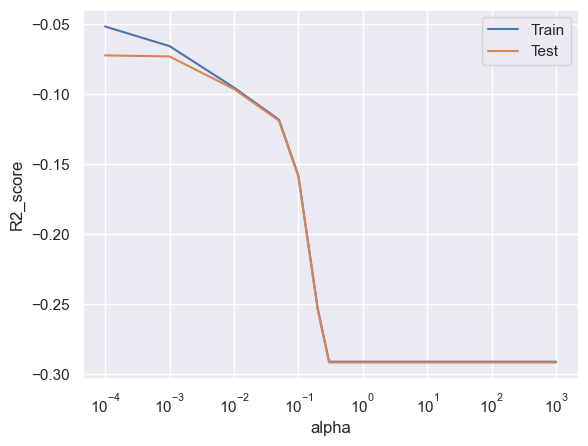

In [75]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

###  As the value of alpha increases, we see a decrease in both train and test error. 
###  However, after a error value of approximately 0.05, error remains constant.

# <font color=palevioletred>Step 6:  Comparing the Two models </font>

In [76]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format


In [77]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.95              0.96
R2 Score (Test)               0.90              0.85
RSS (Train)                   6.41              5.25
RSS (Test)                    5.59              8.05
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.02
RMSE (Train)                  0.08              0.07
RMSE (Test)                   0.11              0.14

###  The R2 score on test data is 0.90 for Ridge Regression and  0.85 for Lasso models.

In [78]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, ...]

In [79]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [80]:
## View the betas/coefficients
betas 

Ridge  Lasso
LotFrontage             0.01   0.00
LotArea                 0.02   0.03
YearRemodAdd            0.03   0.03
MasVnrArea             -0.00   0.00
BsmtFinSF1              0.02   0.02
BsmtFinSF2              0.00   0.00
TotalBsmtSF             0.05   0.05
1stFlrSF                0.00  -0.00
2ndFlrSF                0.03   0.02
LowQualFinSF            0.00   0.00
GrLivArea               0.09   0.09
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00  -0.00
FullBath                0.01   0.01
HalfBath                0.01   0.01
BedroomAbvGr           -0.00  -0.00
KitchenAbvGr            0.00   0.00
Fireplaces              0.01   0.01
GarageArea              0.03   0.03
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.00   0.00
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                  0.00   0.00
Age                    -0.05  -0.07
MSSubClass_30          -0.04  -0.04
MSSubClass_40          -0.01  -0.00
MSSubClass_45           0.00   0.00
MSSubClass_50           0.00   0.00
MSSubClass_60          -0.02  -0.02
MSSubClass_70           0.05   0.04
MSSubClass_75           0.03   0.01
MSSubClass_80          -0.00  -0.00
MSSubClass_85           0.01   0.00
MSSubClass_90          -0.03  -0.08
MSSubClass_120          0.01  -0.00
MSSubClass_160         -0.05  -0.07
MSSubClass_180         -0.03  -0.04
MSSubClass_190         -0.03  -0.06
MSZoning_FV             0.04   0.06
MSZoning_RH             0.03   0.04
MSZoning_RL             0.02   0.03
MSZoning_RM            -0.01   0.00
Street_Pave            -0.01  -0.00
Alley_None             -0.00  -0.00
Alley_Pave              0.02   0.02
LotShape_IR2            0.00  -0.00
LotShape_IR3           -0.02   0.02
LotShape_Reg            0.00   0.00
LandContour_HLS         0.02  -0.00
LandContour_Low         0.02   0.00
LandContour_Lvl         0.02   0.01
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.03   0.02
LotConfig_FR2          -0.02  -0.02
LotConfig_FR3           0.00   0.00
LotConfig_Inside        0.00  -0.00
LandSlope_Mod           0.02   0.01
LandSlope_Sev           0.02   0.01
Neighborhood_Blueste    0.00   0.00
Neighborhood_BrDale    -0.02  -0.03
Neighborhood_BrkSide    0.03   0.06
Neighborhood_ClearCr    0.05   0.07
Neighborhood_CollgCr   -0.02  -0.01
Neighborhood_Crawfor    0.09   0.11
Neighborhood_Edwards   -0.06  -0.05
Neighborhood_Gilbert    0.00  -0.00
Neighborhood_IDOTRR    -0.00   0.02
Neighborhood_MeadowV   -0.07  -0.14
Neighborhood_Mitchel   -0.04  -0.04
Neighborhood_NAmes     -0.03  -0.02
Neighborhood_NPkVill    0.00   0.00
Neighborhood_NWAmes    -0.03  -0.03
Neighborhood_NoRidge    0.01   0.01
Neighborhood_NridgHt    0.03   0.01
Neighborhood_OldTown   -0.03  -0.02
Neighborhood_SWISU      0.03   0.05
Neighborhood_Sawyer    -0.03  -0.02
Neighborhood_SawyerW   -0.01  -0.00
Neighborhood_Somerst    0.05   0.05
Neighborhood_StoneBr    0.05   0.08
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.02
Condition1_Feedr       -0.00   0.01
Condition1_Norm         0.04   0.04
Condition1_PosA         0.01   0.00
Condition1_PosN         0.01   0.02
Condition1_RRAe        -0.04  -0.06
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00   0.00
Condition1_RRNn         0.02   0.01
Condition2_Feedr       -0.00   0.00
Condition2_Norm         0.05   0.05
Condition2_PosA         0.05   0.26
Condition2_PosN        -0.06  -0.51
Condition2_RRAe        -0.01  -0.00
Condition2_RRAn        -0.01  -0.00
Condition2_RRNn         0.01   0.00
BldgType_2fmCon        -0.03  -0.00
BldgType_Duplex        -0.03  -0.01
BldgType_Twnhs         -0.05  -0.03
BldgType_TwnhsE        -0.01  -0.00
HouseStyle_1.5Unf       0.01   0.00
HouseStyle_1Story       0.01   0.00
HouseStyle_2.5Fin       0.00   0.00
HouseStyle_2.5Unf      -0.01  -0.00
HouseStyle_2Story      -0.01  -0.00
HouseStyle_SFoyer      -0.0

In [81]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

Ridge  Lasso
1stFlrSF               0.00  -0.00
LowQualFinSF           0.00   0.00
KitchenAbvGr           0.00   0.00
3SsnPorch              0.00   0.00
PoolArea               0.00   0.00
MiscVal                0.00   0.00
MSSubClass_40         -0.01  -0.00
MSSubClass_45          0.00   0.00
MSSubClass_50          0.00   0.00
MSSubClass_80         -0.00  -0.00
MSSubClass_85          0.01   0.00
MSSubClass_120         0.01  -0.00
MSZoning_RM           -0.01   0.00
Street_Pave           -0.01  -0.00
LandContour_Low        0.02   0.00
Utilities_NoSeWa      -0.01  -0.00
LotConfig_FR3          0.00   0.00
Neighborhood_Blueste   0.00   0.00
Neighborhood_Gilbert   0.00  -0.00
Neighborhood_NPkVill   0.00   0.00
Neighborhood_SawyerW  -0.01  -0.00
Neighborhood_Timber    0.01   0.00
Condition1_RRNe        0.00   0.00
Condition2_Feedr      -0.00   0.00
Condition2_RRAe       -0.01  -0.00
Condition2_RRAn       -0.01  -0.00
Condition2_RRNn        0.01   0.00
BldgType_TwnhsE       -0.01  -0.00
HouseStyle_2.5Fin      0.00   0.00
HouseStyle_2.5Unf     -0.01  -0.00
HouseStyle_SFoyer     -0.00  -0.00
HouseStyle_SLvl        0.01   0.00
OverallQual_2         -0.01  -0.00
OverallQual_6         -0.02  -0.00
OverallQual_10        -0.04   0.00
RoofStyle_Gable       -0.01  -0.00
RoofStyle_Gambrel     -0.01   0.00
RoofStyle_Shed        -0.00  -0.00
RoofMatl_Membran       0.02   0.00
RoofMatl_Metal         0.00  -0.00
RoofMatl_Roll          0.01   0.00
RoofMatl_Tar&Grv       0.00   0.00
RoofMatl_WdShake       0.01   0.00
RoofMatl_WdShngl       0.03   0.00
Exterior1st_AsphShn   -0.00   0.00
Exterior1st_BrkComm   -0.02  -0.00
Exterior1st_CBlock    -0.01  -0.00
Exterior1st_CemntBd   -0.01   0.00
Exterior1st_ImStucc    0.00   0.00
Exterior1st_MetalSd   -0.00   0.00
Exterior1st_Plywood   -0.00  -0.00
Exterior1st_Stone      0.01   0.00
Exterior1st_VinylSd    0.01   0.00
Exterior1st_WdShing    0.01  -0.00
Exterior2nd_AsphShn   -0.00   0.00
Exterior2nd_Brk Cmn    0.00   0.00
Exterior2nd_BrkFace    0.01   0.00
Exterior2nd_CBlock    -0.01  -0.00
Exterior2nd_CmentBd   -0.00   0.00
Exterior2nd_HdBoard    0.00  -0.00
Exterior2nd_ImStucc   -0.00  -0.00
Exterior2nd_MetalSd    0.00   0.00
Exterior2nd_Other      0.00   0.00
Exterior2nd_Stone     -0.00  -0.00
Exterior2nd_Wd Shng   -0.01  -0.00
MasVnrType_None        0.00  -0.00
ExterQual_Fa          -0.01  -0.00
ExterQual_TA          -0.01  -0.00
ExterCond_Fa          -0.01  -0.00
ExterCond_Po           0.00   0.00
Foundation_Slab        0.01   0.00
Foundation_Stone       0.01   0.00
BsmtQual_None         -0.01  -0.00
BsmtCond_None         -0.01  -0.00
BsmtCond_Po           -0.01  -0.00
BsmtFinType1_None     -0.01  -0.00
BsmtFinType2_None     -0.01  -0.00
BsmtFinType2_Unf      -0.00   0.00
Heating_GasW           0.01   0.00
Heating_Wall          -0.01  -0.00
HeatingQC_Po          -0.01  -0.00
Electrical_FuseP       0.01   0.00
Electrical_Mix         0.00   0.00
Electrical_NA          0.00   0.00
Functional_Mod         0.00   0.00
FireplaceQu_Fa         0.00   0.00
FireplaceQu_Po        -0.02  -0.00
GarageType_Basment     0.01  -0.00
GarageType_Detchd      0.01  -0.00
GarageType_None        0.00   0.00
GarageFinish_None      0.00   0.00
GarageQual_None        0.00   0.00
GarageQual_Po         -0.01  -0.00
GarageCond_Fa         -0.01  -0.00
GarageCond_None        0.00   0.00
PavedDrive_Y           0.00  -0.00
PoolQC_Fa              0.01   0.00
PoolQC_None            0.05  -0.00
Fence_MnWw            -0.00  -0.00
Fence_None            -0.00   0.00
MiscFeature_Shed      -0.00   0.00
MiscFeature_TenC       0.00   0.00
SaleType_ConLI        -0.01  -0.00
SaleType_ConLw         0.01   0.00
SaleType_Oth           0.00   0.00
SaleCondition_Family  -0.00   0.00

In [82]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(106, 2)

###  Below are the features selected by Lasso

In [83]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.00
LotArea                  0.03
YearRemodAdd             0.03
MasVnrArea               0.00
BsmtFinSF1               0.02
BsmtFinSF2               0.00
TotalBsmtSF              0.05
2ndFlrSF                 0.02
GrLivArea                0.09
BsmtFullBath             0.01
BsmtHalfBath            -0.00
FullBath                 0.01
HalfBath                 0.01
BedroomAbvGr            -0.00
Fireplaces               0.01
GarageArea               0.03
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.00
MoSold                   0.00
Age                     -0.07
MSSubClass_30           -0.04
MSSubClass_60           -0.02
MSSubClass_70            0.04
MSSubClass_75            0.01
MSSubClass_90           -0.08
MSSubClass_160          -0.07
MSSubClass_180          -0.04
MSSubClass_190          -0.06
MSZoning_FV              0.06
MSZoning_RH              0.04
MSZoning_RL              0.03
Alley_None

# <font color=palevioletred>Step 7: Inferences for 'Surprise Housing' </font>

### Now, we will look at the top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [84]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9          0.10
OverallCond_9          0.09
GrLivArea              0.09
Neighborhood_Crawfor   0.09
OverallQual_8          0.08
Functional_Typ         0.06
Exterior1st_BrkFace    0.06
Neighborhood_Somerst   0.05
Neighborhood_StoneBr   0.05
TotalBsmtSF            0.05
Name: Ridge, dtype: float64

In [85]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.11
OverallCond_9          1.10
GrLivArea              1.09
Neighborhood_Crawfor   1.09
OverallQual_8          1.09
Functional_Typ         1.06
Exterior1st_BrkFace    1.06
Neighborhood_Somerst   1.06
Neighborhood_StoneBr   1.05
TotalBsmtSF            1.05
Name: Ridge, dtype: float64

In [86]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

Condition2_PosA        0.26
OverallCond_9          0.16
OverallQual_9          0.15
SaleType_ConLD         0.13
Neighborhood_Crawfor   0.11
OverallQual_8          0.11
GrLivArea              0.09
SaleCondition_Alloca   0.09
Neighborhood_StoneBr   0.08
Exterior1st_BrkFace    0.08
Name: Lasso, dtype: float64

In [87]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

Condition2_PosA        1.30
OverallCond_9          1.17
OverallQual_9          1.16
SaleType_ConLD         1.14
Neighborhood_Crawfor   1.12
OverallQual_8          1.12
GrLivArea              1.10
SaleCondition_Alloca   1.09
Neighborhood_StoneBr   1.09
Exterior1st_BrkFace    1.09
Name: Lasso, dtype: float64

# <font color=palevioletred>Inferences:</font>
###  The variables significant in predicting the price of a house are: - 
`OverallQual_9`, `OverallCond_9`,`GrLivArea`, `Neighborhood_Crawfor`, `OverallQual_8`, `Exterior1st_BrkFace`, and `Neighborhood_StoneBr`            


###  How well those variables describe the price of a house?
Here will see only top few variables
- `GrLivArea`:an increase of 1 square foot of house area above ground, the price will increase by 1.10 to 1.09 times
- `OverallQual_9`: if the overall material and finish of the house is **Very Good** or **Excellent**, the price of house will increase by 1.16 to 1.11 times
- `Neighborhood_Crawfor`: if Crawford is a nearby location, then the price of house will increase by 1.09 to 1.12 times
- `Exterior1st_BrkFace`: if the exterior covering on the house is **Brick Face**, the price of house will increase by 1.09 to 1.06 times.
- `OverallCond_8` : Rates the overall condition of the house, then the price of house will increase by 1.17 to 1.09 times

In a similar manner, we can deduct how well each variable describes the price of a house.

###  Optimal value of lambda for Ridge Regression = 7


###  Optimal value of lambda for Lasso = 0.0001

# <font color=cornflowerblue>Step 8: Coding for answering the subjective questions </font>

## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

## Answer:

- Optimal value of lambda for Ridge Regression = **07**


- Optimal value of lambda for Lasso = **0.0001**

In [88]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=14)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=14)

In [89]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [90]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.90
RSS (Train) = 7.06
RSS (Test) = 5.54
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.11


In [91]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.0002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [92]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [93]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.87
RSS (Train) = 5.75
RSS (Test) = 7.05
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.08
RMSE (Test) = 0.13


In [94]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.95
R2 Score (Test)               0.90              0.87
RSS (Train)                   7.06              5.75
RSS (Test)                    5.54              7.05
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.02
RMSE (Train)                  0.08              0.08
RMSE (Test)                   0.11              0.13

###  Changes in Ridge Regression metrics:
- R2 score of train set decreased from 0.95 to 0.94
- R2 score of test set same 0.90

###  Changes in Lasso metrics:
- R2 score of train set decreased from 0.96 to 0.95
- R2 score of test set increase from 0.85 to 0.87

In [95]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, ...]

In [96]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [97]:
## View the betas/coefficients
betas 

Ridge  Lasso
LotFrontage             0.01   0.01
LotArea                 0.02   0.03
YearRemodAdd            0.03   0.03
MasVnrArea              0.00   0.00
BsmtFinSF1              0.02   0.02
BsmtFinSF2              0.00   0.00
TotalBsmtSF             0.05   0.05
1stFlrSF                0.01  -0.00
2ndFlrSF                0.03   0.02
LowQualFinSF            0.00   0.00
GrLivArea               0.08   0.09
BsmtFullBath            0.01   0.01
BsmtHalfBath           -0.00  -0.00
FullBath                0.01   0.01
HalfBath                0.01   0.01
BedroomAbvGr           -0.00  -0.00
KitchenAbvGr            0.00   0.00
Fireplaces              0.01   0.01
GarageArea              0.03   0.03
WoodDeckSF              0.01   0.01
OpenPorchSF             0.01   0.01
EnclosedPorch           0.00   0.00
3SsnPorch               0.00   0.00
ScreenPorch             0.00   0.00
PoolArea                0.00   0.00
MiscVal                 0.00   0.00
MoSold                  0.00   0.00
Age                    -0.05  -0.06
MSSubClass_30          -0.03  -0.03
MSSubClass_40          -0.00  -0.00
MSSubClass_45           0.00   0.00
MSSubClass_50           0.00   0.00
MSSubClass_60          -0.01  -0.01
MSSubClass_70           0.05   0.04
MSSubClass_75           0.02   0.00
MSSubClass_80          -0.00   0.00
MSSubClass_85           0.01   0.00
MSSubClass_90          -0.03  -0.07
MSSubClass_120          0.01   0.00
MSSubClass_160         -0.04  -0.06
MSSubClass_180         -0.02  -0.01
MSSubClass_190         -0.02  -0.05
MSZoning_FV             0.03   0.05
MSZoning_RH             0.02   0.03
MSZoning_RL             0.02   0.03
MSZoning_RM            -0.02  -0.00
Street_Pave            -0.00  -0.00
Alley_None             -0.00  -0.00
Alley_Pave              0.02   0.02
LotShape_IR2            0.00  -0.00
LotShape_IR3           -0.02   0.00
LotShape_Reg            0.00   0.00
LandContour_HLS         0.01  -0.00
LandContour_Low         0.01   0.00
LandContour_Lvl         0.02   0.00
Utilities_NoSeWa       -0.01  -0.00
LotConfig_CulDSac       0.03   0.02
LotConfig_FR2          -0.01  -0.01
LotConfig_FR3           0.00   0.00
LotConfig_Inside        0.00  -0.00
LandSlope_Mod           0.02   0.00
LandSlope_Sev           0.01   0.00
Neighborhood_Blueste    0.00   0.00
Neighborhood_BrDale    -0.02  -0.02
Neighborhood_BrkSide    0.03   0.04
Neighborhood_ClearCr    0.04   0.07
Neighborhood_CollgCr   -0.01  -0.01
Neighborhood_Crawfor    0.07   0.11
Neighborhood_Edwards   -0.06  -0.05
Neighborhood_Gilbert   -0.00   0.00
Neighborhood_IDOTRR    -0.01   0.00
Neighborhood_MeadowV   -0.05  -0.13
Neighborhood_Mitchel   -0.03  -0.04
Neighborhood_NAmes     -0.02  -0.02
Neighborhood_NPkVill    0.00   0.00
Neighborhood_NWAmes    -0.02  -0.03
Neighborhood_NoRidge    0.01   0.01
Neighborhood_NridgHt    0.03   0.02
Neighborhood_OldTown   -0.03  -0.02
Neighborhood_SWISU      0.02   0.03
Neighborhood_Sawyer    -0.03  -0.02
Neighborhood_SawyerW   -0.01  -0.00
Neighborhood_Somerst    0.05   0.05
Neighborhood_StoneBr    0.04   0.06
Neighborhood_Timber     0.01   0.00
Neighborhood_Veenker    0.02   0.02
Condition1_Feedr       -0.00   0.00
Condition1_Norm         0.04   0.03
Condition1_PosA         0.01   0.00
Condition1_PosN         0.00   0.00
Condition1_RRAe        -0.03  -0.06
Condition1_RRAn         0.01   0.00
Condition1_RRNe         0.00  -0.00
Condition1_RRNn         0.01   0.00
Condition2_Feedr       -0.00  -0.00
Condition2_Norm         0.03   0.04
Condition2_PosA         0.03   0.15
Condition2_PosN        -0.04  -0.38
Condition2_RRAe        -0.01  -0.00
Condition2_RRAn        -0.01  -0.00
Condition2_RRNn         0.01   0.00
BldgType_2fmCon        -0.02  -0.00
BldgType_Duplex        -0.03  -0.01
BldgType_Twnhs         -0.04  -0.03
BldgType_TwnhsE        -0.01  -0.00
HouseStyle_1.5Unf       0.01   0.00
HouseStyle_1Story       0.01   0.00
HouseStyle_2.5Fin       0.00   0.00
HouseStyle_2.5Unf      -0.00  -0.00
HouseStyle_2Story      -0.01  -0.01
HouseStyle_SFoyer      -0.0

### Now, we look at the most important predictor variables after the change is implemented.

In [98]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.08
OverallQual_9          0.08
OverallQual_8          0.08
Neighborhood_Crawfor   0.07
OverallCond_9          0.06
Functional_Typ         0.06
TotalBsmtSF            0.05
Exterior1st_BrkFace    0.05
Neighborhood_Somerst   0.05
MSSubClass_70          0.05
Name: Ridge, dtype: float64

In [99]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.07
Functional_Typ         1.06
TotalBsmtSF            1.05
Exterior1st_BrkFace    1.05
Neighborhood_Somerst   1.05
MSSubClass_70          1.05
Name: Ridge, dtype: float64

In [100]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallCond_9          0.16
OverallQual_9          0.15
Condition2_PosA        0.15
OverallQual_8          0.11
Neighborhood_Crawfor   0.11
GrLivArea              0.09
Exterior1st_BrkFace    0.08
OverallCond_8          0.08
SaleType_ConLD         0.07
OverallCond_7          0.07
Name: Lasso, dtype: float64

In [101]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallCond_9          1.18
OverallQual_9          1.16
Condition2_PosA        1.16
OverallQual_8          1.12
Neighborhood_Crawfor   1.11
GrLivArea              1.10
Exterior1st_BrkFace    1.08
OverallCond_8          1.08
SaleType_ConLD         1.08
OverallCond_7          1.08
Name: Lasso, dtype: float64

### So, the most important predictor variables after we double the alpha values are:-

- `GrLivArea`

- `OverallQual_8`

- `OverallQual_9`

- `Neighborhood_Crawfor`

- `OverallCond_9`

- `Exterior1st_BrkFace`



## Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

## Answer

- The model we will choose to apply will depend on the use case.
- If we have too many variables and one of our primary goal is feature selection, then we will use **Lasso**.
- If we don't want to get too large coefficients and reduction of coefficient magnitude is one of our prime goals, then we will use **Ridge Regression**.

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

## Answer

- Here, we will drop the top 5 features in Lasso model and build the model again.

Top 5 Lasso predictors were:  `OverallCond_9`, `OverallQual_9`,`Condition2_PosA`,`OverallQual_8` and `Neighborhood_Crawfor`

In [102]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallCond_9', 'OverallQual_9', 'Condition2_PosA', 'OverallQual_8', 'Neighborhood_Crawfor']

In [103]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [104]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.0001}

###  Thus, we get optimum value of alpha as 0.0001. Now we will build a lasso regression model using this value.

In [106]:
# Create a lasso instance with optimum value alpha=0.0001
lasso = Lasso(alpha=0.0001)

In [107]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.0001)

In [108]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [109]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.96
R-Squared (Test) = 0.85
RSS (Train) = 5.57
RSS (Test) = 8.05
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.07
RMSE (Test) = 0.14


### Now, we will find the top 5 predictors

In [110]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)              0.96
R2 Score (Test)               0.85
RSS (Train)                   5.57
RSS (Test)                    8.05
MSE (Train)                   0.01
MSE (Test)                    0.02
RMSE (Train)                  0.07
RMSE (Test)                   0.14

In [111]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, ...]

In [112]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_


In [113]:
## View the betas/coefficients
betas 

Lasso
LotFrontage             0.00
LotArea                 0.03
YearRemodAdd            0.03
MasVnrArea              0.00
BsmtFinSF1              0.02
BsmtFinSF2              0.00
TotalBsmtSF             0.05
1stFlrSF                0.00
2ndFlrSF                0.03
LowQualFinSF            0.00
GrLivArea               0.09
BsmtFullBath            0.01
BsmtHalfBath           -0.00
FullBath                0.01
HalfBath                0.01
BedroomAbvGr           -0.00
KitchenAbvGr            0.00
Fireplaces              0.01
GarageArea              0.03
WoodDeckSF              0.01
OpenPorchSF             0.01
EnclosedPorch           0.00
3SsnPorch               0.00
ScreenPorch             0.00
PoolArea                0.00
MiscVal                 0.00
MoSold                  0.00
Age                    -0.06
MSSubClass_30          -0.04
MSSubClass_40          -0.00
MSSubClass_45           0.00
MSSubClass_50           0.00
MSSubClass_60          -0.02
MSSubClass_70           0.07
MSSubClass_75           0.04
MSSubClass_80          -0.00
MSSubClass_85           0.00
MSSubClass_90          -0.07
MSSubClass_120         -0.00
MSSubClass_160         -0.07
MSSubClass_180         -0.04
MSSubClass_190         -0.05
MSZoning_FV             0.07
MSZoning_RH             0.06
MSZoning_RL             0.04
MSZoning_RM             0.01
Street_Pave            -0.00
Alley_None              0.00
Alley_Pave              0.02
LotShape_IR2           -0.01
LotShape_IR3            0.01
LotShape_Reg            0.00
LandContour_HLS         0.00
LandContour_Low        -0.00
LandContour_Lvl         0.01
Utilities_NoSeWa       -0.00
LotConfig_CulDSac       0.02
LotConfig_FR2          -0.02
LotConfig_FR3          -0.00
LotConfig_Inside        0.00
LandSlope_Mod           0.02
LandSlope_Sev           0.00
Neighborhood_Blueste   -0.00
Neighborhood_BrDale    -0.06
Neighborhood_BrkSide    0.00
Neighborhood_ClearCr    0.03
Neighborhood_CollgCr   -0.04
Neighborhood_Edwards   -0.09
Neighborhood_Gilbert   -0.02
Neighborhood_IDOTRR    -0.02
Neighborhood_MeadowV   -0.18
Neighborhood_Mitchel   -0.07
Neighborhood_NAmes     -0.06
Neighborhood_NPkVill   -0.00
Neighborhood_NWAmes    -0.07
Neighborhood_NoRidge   -0.01
Neighborhood_NridgHt   -0.00
Neighborhood_OldTown   -0.07
Neighborhood_SWISU      0.00
Neighborhood_Sawyer    -0.06
Neighborhood_SawyerW   -0.03
Neighborhood_Somerst    0.02
Neighborhood_StoneBr    0.06
Neighborhood_Timber    -0.01
Neighborhood_Veenker    0.00
Condition1_Feedr        0.00
Condition1_Norm         0.04
Condition1_PosA         0.01
Condition1_PosN         0.03
Condition1_RRAe        -0.06
Condition1_RRAn         0.00
Condition1_RRNe         0.00
Condition1_RRNn         0.01
Condition2_Feedr       -0.00
Condition2_Norm         0.04
Condition2_PosN        -0.55
Condition2_RRAe        -0.00
Condition2_RRAn        -0.00
Condition2_RRNn         0.00
BldgType_2fmCon        -0.00
BldgType_Duplex        -0.01
BldgType_Twnhs         -0.03
BldgType_TwnhsE        -0.00
HouseStyle_1.5Unf       0.00
HouseStyle_1Story       0.00
HouseStyle_2.5Fin       0.00
HouseStyle_2.5Unf      -0.00
HouseStyle_2Story      -0.01
HouseStyle_SFoyer       0.00
HouseStyle_SLvl         0.00
OverallQual_2          -0.04
OverallQual_3          -0.14
OverallQual_4          -0.13
OverallQual_5          -0.11
OverallQual_6          -0.10
OverallQual_7          -0.04
OverallQual_10         -0.08
OverallCond_2          -0.23
OverallCond_3          -0.18
OverallCond_4          -0.13
OverallCond_5          -0.11
OverallCond_6          -0.07
OverallCond_7          -0.03
OverallCond_8          -0.02
RoofStyle_Gable        -0.00
RoofStyle_Gambrel       0.00
RoofStyle_Hip          -0.00
RoofStyle_Mansard       0.03
RoofStyle_Shed         -0.00
RoofMatl_CompShg       -0.02
RoofMatl_Membran        0.00
RoofMatl_Metal         -0.00
RoofMatl_Roll           0.00
RoofMatl_Tar&Grv        0.00
RoofMatl_WdShake       -0.00
RoofMatl_WdShngl        0.00
Exterior1st_AsphShn     0.00
Exterior1st_BrkComm  

### Now, we will look at the top 5 features significant in predicting the value of a house according to the new lasso model

In [114]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

SaleType_ConLD         0.14
SaleCondition_Alloca   0.09
GrLivArea              0.09
Exterior1st_BrkFace    0.08
MSZoning_FV            0.07
Name: Lasso, dtype: float64

###  After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-

- `SaleType_ConLD`


- `SaleCondition_Alloca`


- `GrLivArea`


- `Exterior1st_BrkFace`


- `MSZoning_FV`


## Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

## Answer

- A model is **robust** when any variation in the data does not affect its performance much. 
- A **generalizable** model is able to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.
- To make sure a model is robust and generalizable, we have to **take care it doesn't overfit**. This is because an overfitting model has very high variance and a smallest change in data affects the model prediction heavily. Such a model will identify all the patterns of a training data, but fail to pick up the patterns in unseen test data.
- In other words, the model should not be too complex in order to be robust and generalizable.






- If we look at it from the prespective of **Accuracy**, a too complex model will have a very high accuracy. So, to make our model more robust and generalizable, we will have to decrease variance which will lead to some bias. Addition of bias means that accuracy will decrease.
- In general, we have to find strike some balance between model accuracy and complexity. This can be achieved by Regularization techniques like Ridge Regression and Lasso.




